In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import openml

import seaborn as sns

In [8]:
dataset = openml.datasets.get_dataset(43743) 

/var/folders/j1/fbnkytjn7kb6y_mjzpv7r0l40000gn/T/ipykernel_2471/3360327899.py:1: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(43743)


In [9]:
data, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="dataframe", target=dataset.default_target_attribute)

In [11]:
data.columns = [
    'Customer_ID', 'First_EMI_Bounced', 'Bounces_Last_12_Months', 'Max_MOB', 'Bounces_While_Repaying',
    'EMI_Amount', 'Loan_Amount', 'Loan_Tenure', 'Dealer_Code', 'Two_Wheeler_Product_Code',
    'Advance_EMI_Paid', 'Interest_Rate', 'Gender', 'Employment_Type', 'Resident_Type', 'Date_of_Birth',
    'Age', 'Number_of_Loans', 'Number_of_Secured_Loans', 'Number_of_Unsecured_Loans',
    'Max_Amount_Sanctioned_Live_Loans', 'Number_of_New_Loans_Last_3_Months',
    'Total_Sanctioned_Amount_Secured_Live_Loans', 'Total_Sanctioned_Amount_Unsecured_Live_Loans',
    'Max_Amount_Sanctioned_Two_Wheeler_Loan', 'Time_Since_Last_Personal_Loan',
    'Time_Since_First_Consumer_Durables_Loan', 'Number_of_Times_30_Days_Past_Due_Last_6_Months',
    'Number_of_Times_60_Days_Past_Due_Last_6_Months', 'Number_of_Times_90_Days_Past_Due_Last_3_Months',
    'Tier', 'Target'
]

In [17]:
# 違約損失金額

data[data['Target']==1]['Loan_Amount'].sum().astype(int)

75302585

In [26]:
#整體違約率

x = data[data['Target']==1]['Loan_Amount'].sum()
y = data['Loan_Amount'].sum()
print(f"{(x/y)*100:.2f}%")

2.25%


V1: 客戶ID

V2: 客戶是否在第一期貸款分期中出現過拋錢（1: 拋錢，0: 未拋錢）

V3: 最近12個月內拋錢的次數

V4: 最大MOB（與TVS信貸合作的月份）

V5: 還貸款時的拋錢次數

V6: 每月還款金額（EMI）

V7: 貸款金額

V8: 貸款期限

V9: 客戶購買摩托車的經銷商代碼

V10: 摩托車產品代碼（MC: 摩托車，MO: 摩托車，SC: 滑板車）

V11: 預付EMI支付的次數

V12: 利率

V13: 性別（男性/女性）

V14: 就業類型（HOUSEWIFE: 家庭主婦，SELF: 自僱，SAL: 工薪，PENS: 養老金領取者，STUDENT: 學生）

V15: 客戶居住類型

V16: 出生日期

V17: 貸款時客戶的年齡

V18: 貸款數量

V19: 抵押貸款數量

V20: 無抵押貸款數量

V21: 現有貸款中最高核准金額

V22: 過去3個月內的新貸款數量

V23: 活躍抵押貸款的總核准金額

V24: 活躍無抵押貸款的總核准金額

V25: 任何摩托車貸款的最高核准金額

V26: 自上次個人貸款以來的時間（以月計）

V27: 自首次消費品貸款以來的時間（以月計）

V28: 最近6個月內30天以上逾期的次數

V29: 最近6個月內60天以上逾期的次數

V30: 最近3個月內90天以上逾期的次數

V31: 地區等級（客戶所在地理位置）

V32: 目標變量（1: 違約者 / 0: 非違約者）

## Data Cleaning

In [13]:
data.columns

Index(['Customer_ID', 'First_EMI_Bounced', 'Bounces_Last_12_Months', 'Max_MOB',
       'Bounces_While_Repaying', 'EMI_Amount', 'Loan_Amount', 'Loan_Tenure',
       'Dealer_Code', 'Two_Wheeler_Product_Code', 'Advance_EMI_Paid',
       'Interest_Rate', 'Gender', 'Employment_Type', 'Resident_Type',
       'Date_of_Birth', 'Age', 'Number_of_Loans', 'Number_of_Secured_Loans',
       'Number_of_Unsecured_Loans', 'Max_Amount_Sanctioned_Live_Loans',
       'Number_of_New_Loans_Last_3_Months',
       'Total_Sanctioned_Amount_Secured_Live_Loans',
       'Total_Sanctioned_Amount_Unsecured_Live_Loans',
       'Max_Amount_Sanctioned_Two_Wheeler_Loan',
       'Time_Since_Last_Personal_Loan',
       'Time_Since_First_Consumer_Durables_Loan',
       'Number_of_Times_30_Days_Past_Due_Last_6_Months',
       'Number_of_Times_60_Days_Past_Due_Last_6_Months',
       'Number_of_Times_90_Days_Past_Due_Last_3_Months', 'Tier', 'Target'],
      dtype='object')

In [14]:
data.info()
# Number_of_New_Loans_Last_3_Months 都為 0 可刪

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Customer_ID                                     119528 non-null  int64  
 1   First_EMI_Bounced                               119528 non-null  uint8  
 2   Bounces_Last_12_Months                          119528 non-null  uint8  
 3   Max_MOB                                         85048 non-null   float64
 4   Bounces_While_Repaying                          85048 non-null   float64
 5   EMI_Amount                                      85048 non-null   float64
 6   Loan_Amount                                     85048 non-null   float64
 7   Loan_Tenure                                     85048 non-null   float64
 8   Dealer_Code                                     85048 non-null   float64
 9   Two_Wheeler_Product_Code  

In [27]:
# 刪除遺失值（每月還款金額：分析仍有貸款契約關係的客戶）
df = data.dropna(subset=['EMI_Amount'])
df = df.drop(columns=['Customer_ID', 'Date_of_Birth'])

In [29]:
# 變數轉換
df['Max_MOB'] = df['Max_MOB'].astype(int)
df['Bounces_While_Repaying'] = df['Bounces_While_Repaying'].astype(int)
df['EMI_Amount'] = df['EMI_Amount'].astype(int)
df['Loan_Amount'] = df['Loan_Amount'].astype(int)
df['Loan_Tenure'] = df['Loan_Tenure'].astype(int)
df['Advance_EMI_Paid'] = df['Advance_EMI_Paid'].astype(int)
df['Age'] = df['Age'].astype(int)

df['Dealer_Code'] = df['Dealer_Code'].astype(int)
df['Dealer_Code'] = df['Dealer_Code'].astype(object)
df['Resident_Type'] = df['Resident_Type'].fillna('Unknown')

# 填補目前現有的Loan_Amount
df['Max_Amount_Sanctioned_Live_Loans'] = df['Max_Amount_Sanctioned_Live_Loans'].fillna(df['Loan_Amount'])

# 填補平均值
df['Max_Amount_Sanctioned_Two_Wheeler_Loan'] = df['Max_Amount_Sanctioned_Two_Wheeler_Loan'].fillna(df['Max_Amount_Sanctioned_Two_Wheeler_Loan'].mean())

# 填補0
df['Total_Sanctioned_Amount_Secured_Live_Loans']=df['Total_Sanctioned_Amount_Secured_Live_Loans'].fillna(0)
df['Total_Sanctioned_Amount_Unsecured_Live_Loans']=df['Total_Sanctioned_Amount_Unsecured_Live_Loans'].fillna(0)
df['Time_Since_Last_Personal_Loan'] = df['Time_Since_Last_Personal_Loan'].fillna(0)
df['Time_Since_First_Consumer_Durables_Loan'] = df['Time_Since_First_Consumer_Durables_Loan'].fillna(0)

# df.to_csv('df.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 85048 entries, 0 to 85047
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   First_EMI_Bounced                               85048 non-null  uint8  
 1   Bounces_Last_12_Months                          85048 non-null  uint8  
 2   Max_MOB                                         85048 non-null  int64  
 3   Bounces_While_Repaying                          85048 non-null  int64  
 4   EMI_Amount                                      85048 non-null  int64  
 5   Loan_Amount                                     85048 non-null  int64  
 6   Loan_Tenure                                     85048 non-null  int64  
 7   Dealer_Code                                     85048 non-null  object 
 8   Two_Wheeler_Product_Code                        85048 non-null  object 
 9   Advance_EMI_Paid                            

In [30]:
df['Target'].value_counts()

Target
0    83194
1     1854
Name: count, dtype: int64

In [31]:
# 客戶屬性：
# 性別、年齡、居住類型、就業類型
df['Gender'].value_counts()

Gender
MALE      73608
FEMALE    11440
Name: count, dtype: int64

In [32]:
df.groupby('Gender')['Loan_Amount'].mean()

Gender
FEMALE    42218.625087
MALE      38890.393666
Name: Loan_Amount, dtype: float64

In [33]:
df.groupby('Gender')['EMI_Amount'].mean()

Gender
FEMALE    2438.249738
MALE      2308.209257
Name: EMI_Amount, dtype: float64

In [34]:
df.groupby('Gender')['Target'].sum()

Gender
FEMALE     185
MALE      1669
Name: Target, dtype: uint64

In [35]:
df['Resident_Type'].value_counts()

Resident_Type
OWNED               73013
RENT                11001
Unknown               917
OWENED BY OFFICE      117
Name: count, dtype: int64

In [36]:
df.groupby('Resident_Type')['Loan_Amount'].mean()

Resident_Type
OWENED BY OFFICE    43525.811966
OWNED               39015.536151
RENT                41297.137260
Unknown             40983.097056
Name: Loan_Amount, dtype: float64

In [37]:
df.groupby('Resident_Type')['EMI_Amount'].mean()

Resident_Type
OWENED BY OFFICE    2450.863248
OWNED               2320.553093
RENT                2354.014181
Unknown             2379.978190
Name: EMI_Amount, dtype: float64

In [38]:
df.groupby('Resident_Type')['Target'].sum()

Resident_Type
OWENED BY OFFICE       3
OWNED               1629
RENT                 209
Unknown               13
Name: Target, dtype: uint64

In [39]:
df['Employment_Type'].value_counts()

Employment_Type
SELF         59290
SAL          23360
HOUSEWIFE     1670
STUDENT        449
PENS           279
Name: count, dtype: int64

SELF: Self-employed（自僱）

SAL: Salaried（受薪）

HOUSEWIFE: Housewife（家庭主婦）

STUDENT: Student（學生）

PENS: Pensioner（退休人士）

In [247]:
df.groupby('Employment_Type')['Loan_Amount'].mean()

Employment_Type
HOUSEWIFE    41671.794012
PENS         42060.523297
SAL          42521.395462
SELF         37953.438455
STUDENT      46189.804009
Name: Loan_Amount, dtype: float64

In [248]:
df.groupby('Employment_Type')['EMI_Amount'].mean()

Employment_Type
HOUSEWIFE    2429.300000
PENS         2457.498208
SAL          2434.918193
SELF         2277.139501
STUDENT      2588.821826
Name: EMI_Amount, dtype: float64

In [249]:
df.groupby('Employment_Type')['Target'].sum()

Employment_Type
HOUSEWIFE      17
PENS            2
SAL           420
SELF         1409
STUDENT         6
Name: Target, dtype: uint64

In [40]:
df_dummies = pd.get_dummies(df, columns=['Two_Wheeler_Product_Code', 'Gender', 'Employment_Type', 'Resident_Type', 'Tier'],  dtype =int)
df_dummies.head()

First_EMI_Bounced  Bounces_Last_12_Months  Max_MOB  Bounces_While_Repaying  \
0                  0                       0       24                       0   
1                  0                       1       24                       1   
2                  0                       0       26                       0   
3                  0                       0       24                       0   
4                  0                       0       27                       0   

   EMI_Amount  Loan_Amount  Loan_Tenure Dealer_Code  Advance_EMI_Paid  \
0        2432        46500           24        1385                 0   
1        1495        28168           24        2496                 0   
2        1707        38900           30        1346                 0   
3        2128        42900           24        1375                 2   
4        1824        40900           30        4140                 0   

   Interest_Rate  ...  Employment_Type_SELF  Employment_Type_STUDENT  \
0          12.75  ...                     0                        0   
1          13.65  ...                     1                        0   
2          12.65  ...                     1                        0   
3           9.50  ...                     0                        0   
4          13.50  ...                     0                        0   

   Resident_Type_OWENED BY OFFICE  Resident_Type_OWNED  Resident_Type_RENT  \
0                               0                    1                   0   
1                               0                    0                   1   
2                               0                    0                   1   
3                               0                    0                   1   
4                               0                    0                   1   

   Resident_Type_Unknown  Tier_TIER 1  Tier_TIER 2  Tier_TIER 3  Tier_TIER 4  
0                      0            1            0            0            0  
1                      0            1            0            0            0  
2                      0            1            0            0            0  
3                      0            1            0            0            0  
4                      0            1            0            0            0  

[5 rows x 45 columns]

In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV, KFold

In [42]:
x = df_dummies.drop(['Target', 'Dealer_Code', 'Number_of_New_Loans_Last_3_Months'], axis=1) 
y = df_dummies['Target']

## SMOTE

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,
                                                   stratify=y)

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

## 1. Decision Tree

In [44]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_resampled, y_train_resampled)

print(classification_report(y_test, dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     24959
           1       0.10      0.16      0.12       556

    accuracy                           0.95     25515
   macro avg       0.54      0.56      0.55     25515
weighted avg       0.96      0.95      0.96     25515



In [45]:
pd.DataFrame(dt.feature_importances_, 
             index=x_train_resampled.columns)[0].sort_values(ascending=False).head(20)

Number_of_Times_30_Days_Past_Due_Last_6_Months    0.313625
Tier_TIER 2                                       0.114996
Tier_TIER 1                                       0.072640
Tier_TIER 4                                       0.060097
Tier_TIER 3                                       0.057183
Number_of_Secured_Loans                           0.044598
Number_of_Loans                                   0.031995
Employment_Type_SELF                              0.024043
Max_Amount_Sanctioned_Live_Loans                  0.021806
Interest_Rate                                     0.020582
Age                                               0.018936
EMI_Amount                                        0.017302
Two_Wheeler_Product_Code_TL                       0.017239
Loan_Amount                                       0.015130
Max_Amount_Sanctioned_Two_Wheeler_Loan            0.012536
Gender_FEMALE                                     0.011469
Max_MOB                                           0.0113

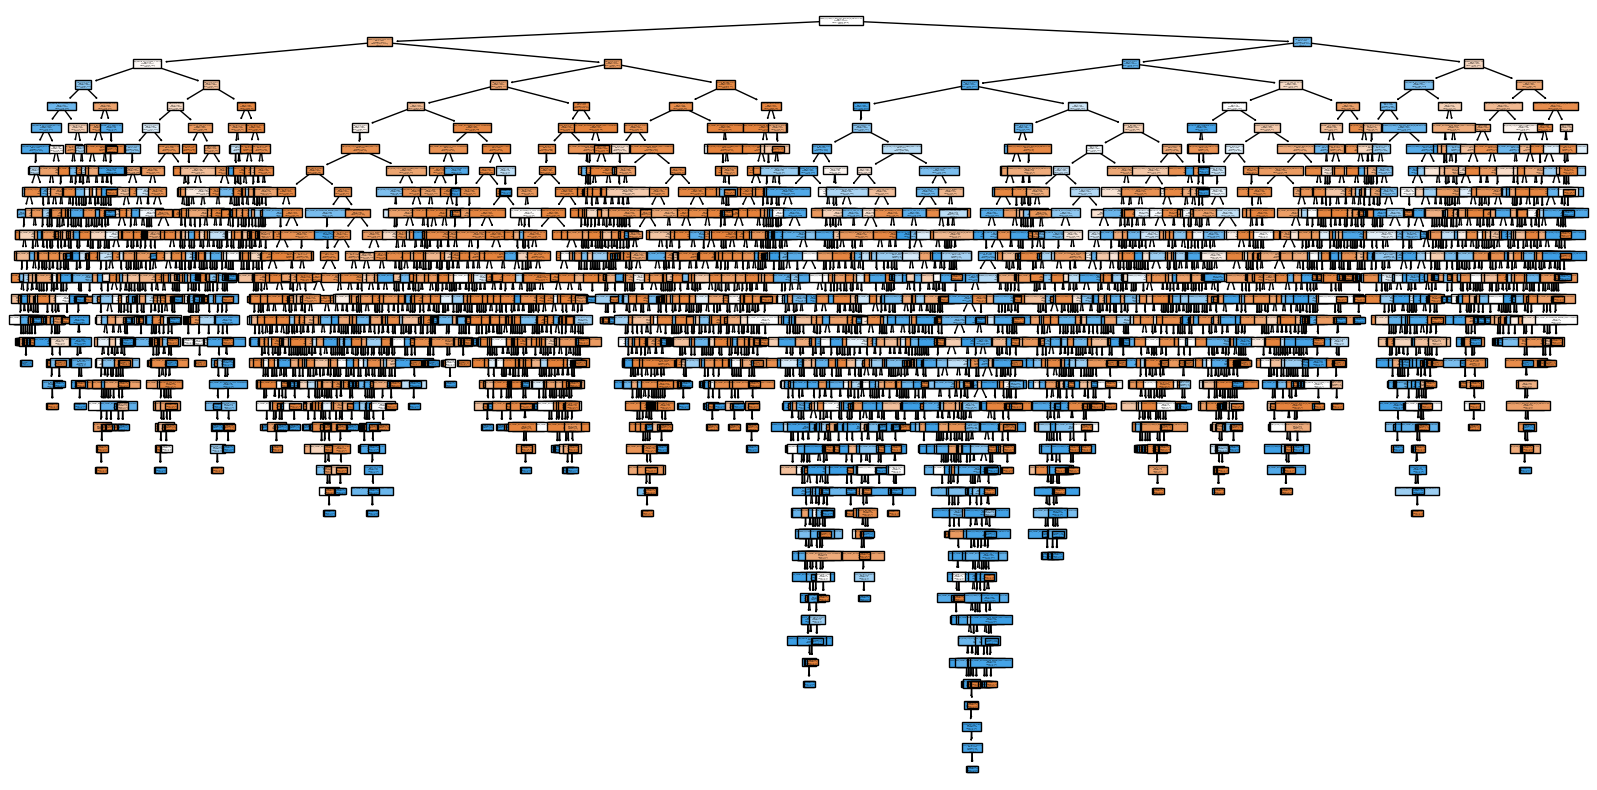

In [282]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=x_train.columns, class_names=['0', '1'])
plt.show()

## 1.1 Decision Tree 調整參數

In [47]:
dt_param_grid = {
    "ccp_alpha":np.linspace(0, .1, 100)}

splitter = KFold(
    n_splits=10,
    shuffle=True,
    random_state=48)

recall_scorer = make_scorer(
    recall_score, 
    greater_is_better=True)

dt_searcher = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    scoring=recall_scorer,
    refit=True,
    cv=splitter)

_= dt_searcher.fit(x_train, y_train)
best_dt = dt_searcher.best_estimator_

In [48]:
print(classification_report(y_test, best_dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     24959
           1       0.10      0.13      0.11       556

    accuracy                           0.96     25515
   macro avg       0.54      0.55      0.54     25515
weighted avg       0.96      0.96      0.96     25515



In [49]:
pd.DataFrame(best_dt.feature_importances_, 
             index=x_train_resampled.columns)[0].sort_values(ascending=False).head(20)

EMI_Amount                                        0.115985
Age                                               0.089039
Interest_Rate                                     0.087735
Max_Amount_Sanctioned_Live_Loans                  0.076448
Max_MOB                                           0.061538
Loan_Amount                                       0.061280
Max_Amount_Sanctioned_Two_Wheeler_Loan            0.057919
Number_of_Times_30_Days_Past_Due_Last_6_Months    0.057351
Number_of_Loans                                   0.052767
Bounces_While_Repaying                            0.032238
Bounces_Last_12_Months                            0.030601
Number_of_Times_60_Days_Past_Due_Last_6_Months    0.030540
Advance_EMI_Paid                                  0.024278
Total_Sanctioned_Amount_Secured_Live_Loans        0.023838
Time_Since_First_Consumer_Durables_Loan           0.020208
Total_Sanctioned_Amount_Unsecured_Live_Loans      0.019458
Loan_Tenure                                       0.0150

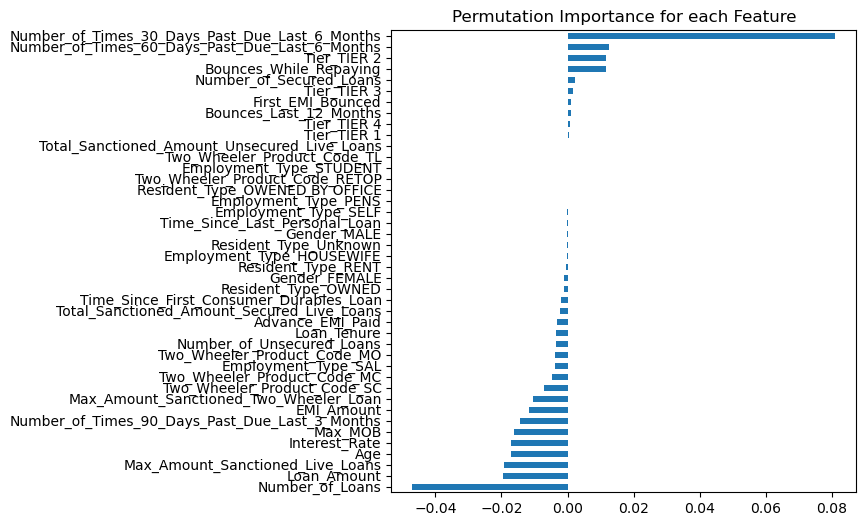

In [50]:
dt_pfi = permutation_importance(best_dt, x_test, y_test, 
                                scoring = recall_scorer,
                                n_repeats=20, random_state=48, n_jobs =-1)

plt.figure(figsize=(6, 6))
pd.Series(dt_pfi.importances_mean, index=x_test.columns).sort_values().plot.barh()
plt.title('Permutation Importance for each Feature')
plt.show()

## 2. Random Forest

In [51]:
rf = RandomForestClassifier(
    n_estimators=500,
    criterion="gini",
    max_features="sqrt",
    random_state=48)

In [52]:
rf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=500, random_state=48)

In [53]:
print(classification_report(y_test, rf.predict(x_test))) #new

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     24959
           1       0.23      0.08      0.12       556

    accuracy                           0.97     25515
   macro avg       0.61      0.54      0.55     25515
weighted avg       0.96      0.97      0.97     25515



In [54]:
pd.DataFrame(rf.feature_importances_, 
             index=x_train_resampled.columns)[0].sort_values(ascending=False).head(20)

Number_of_Times_30_Days_Past_Due_Last_6_Months    0.147250
Number_of_Times_60_Days_Past_Due_Last_6_Months    0.083033
Tier_TIER 3                                       0.074716
Tier_TIER 4                                       0.064676
Tier_TIER 1                                       0.050596
Tier_TIER 2                                       0.038043
Employment_Type_SAL                               0.036293
Number_of_Times_90_Days_Past_Due_Last_3_Months    0.035053
Max_Amount_Sanctioned_Live_Loans                  0.031726
Age                                               0.030104
Loan_Amount                                       0.029155
Interest_Rate                                     0.028231
Employment_Type_SELF                              0.028132
Number_of_Loans                                   0.026241
EMI_Amount                                        0.024395
Max_Amount_Sanctioned_Two_Wheeler_Loan            0.024351
Number_of_Secured_Loans                           0.0242

## 2.1 Random Forest 調整參數

In [55]:
rf_param_grid = {
    'max_depth': np.arange(5, 21, 5)}

splitter = KFold(
    n_splits=5, 
    shuffle=True, 
    random_state=48)

recall_scorer = make_scorer(
    recall_score, 
    greater_is_better=True)

In [56]:
rf_searcher = GridSearchCV(
    estimator=rf, 
    param_grid=rf_param_grid, 
    cv=splitter, 
    scoring=recall_scorer,
    refit=True,
    n_jobs=-1 )

_ = rf_searcher.fit(x_train_resampled, y_train_resampled)
best_rf = rf_searcher.best_estimator_

In [57]:
print(classification_report(y_test, best_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     24959
           1       0.22      0.14      0.17       556

    accuracy                           0.97     25515
   macro avg       0.60      0.56      0.58     25515
weighted avg       0.96      0.97      0.97     25515



In [58]:
pd.DataFrame(best_rf.feature_importances_, 
             index=x_test.columns)[0].sort_values(ascending=False).head(20)

Number_of_Times_30_Days_Past_Due_Last_6_Months    0.152897
Number_of_Times_60_Days_Past_Due_Last_6_Months    0.089062
Tier_TIER 3                                       0.074462
Tier_TIER 4                                       0.065085
Tier_TIER 1                                       0.050011
Employment_Type_SAL                               0.038715
Tier_TIER 2                                       0.037574
Number_of_Times_90_Days_Past_Due_Last_3_Months    0.035704
Employment_Type_SELF                              0.029964
Max_Amount_Sanctioned_Live_Loans                  0.028594
Age                                               0.027292
Number_of_Loans                                   0.026893
Loan_Amount                                       0.026111
Interest_Rate                                     0.025452
Number_of_Secured_Loans                           0.024469
Max_Amount_Sanctioned_Two_Wheeler_Loan            0.022300
EMI_Amount                                        0.0210

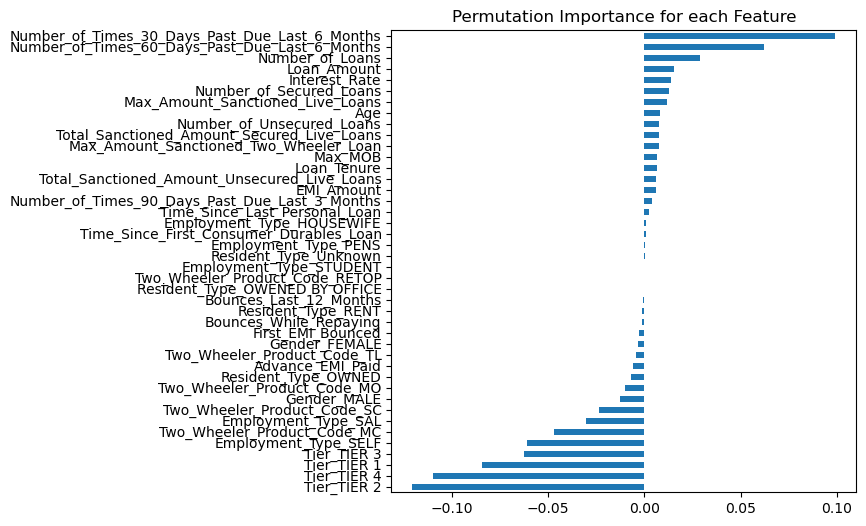

In [59]:
rf_pfi = permutation_importance(best_rf, x_test, y_test, 
                                scoring = recall_scorer,
                                n_repeats=20, random_state=48, n_jobs =-1)

plt.figure(figsize=(6, 6))
pd.Series(rf_pfi.importances_mean, index=x_test.columns).sort_values().plot.barh()
plt.title('Permutation Importance for each Feature')
plt.show()

## 3. XGboost

In [60]:
import xgboost as xgb
import shap

xgb_model = xgb.XGBClassifier()

_ = xgb_model.fit(x_train_resampled, y_train_resampled)

In [61]:
print(classification_report(y_test, xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     24959
           1       0.22      0.12      0.16       556

    accuracy                           0.97     25515
   macro avg       0.60      0.56      0.57     25515
weighted avg       0.96      0.97      0.97     25515



In [62]:
# 獲取特徵重要性
importance = xgb_model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])

# 按重要性排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                           Feature  Importance
8                                    Interest_Rate       448.0
13                Max_Amount_Sanctioned_Live_Loans       388.0
9                                              Age       341.0
5                                      Loan_Amount       310.0
4                                       EMI_Amount       303.0
16          Max_Amount_Sanctioned_Two_Wheeler_Loan       277.0
2                                          Max_MOB       231.0
19  Number_of_Times_30_Days_Past_Due_Last_6_Months       215.0
6                                      Loan_Tenure       200.0
14      Total_Sanctioned_Amount_Secured_Live_Loans       149.0
10                                 Number_of_Loans       134.0
20  Number_of_Times_60_Days_Past_Due_Last_6_Months       133.0
3                           Bounces_While_Repaying       114.0
7                                 Advance_EMI_Paid       105.0
15    Total_Sanctioned_Amount_Unsecured_Live_Loans     

<Figure size 1000x800 with 0 Axes>

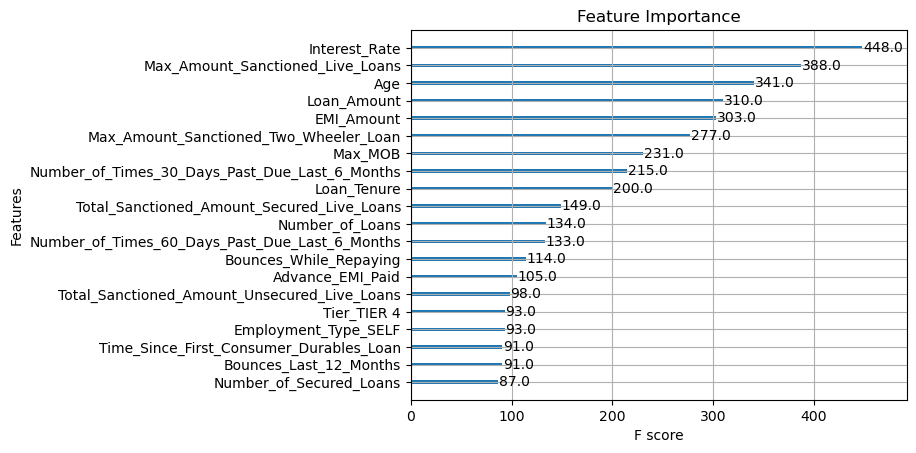

In [63]:
import matplotlib.pyplot as plt

# 繪製特徵重要性
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=20)
plt.title('Feature Importance')
plt.show()

 99%|===================| 25323/25515 [00:58<00:00]        

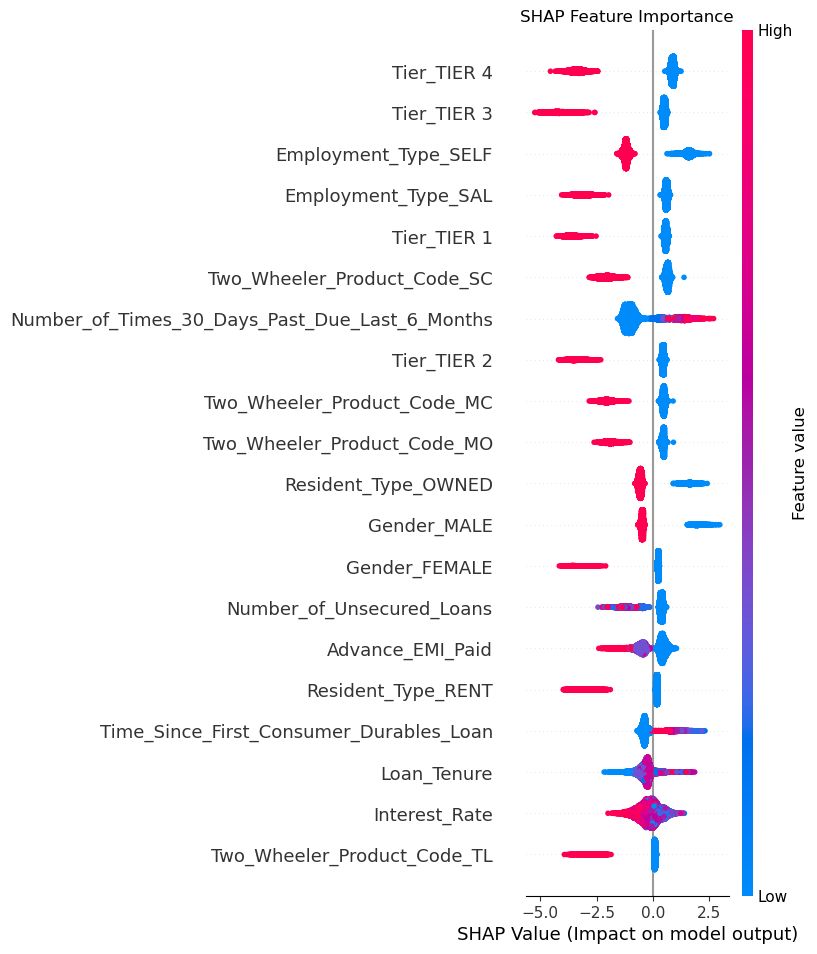

In [64]:
explainer = shap.Explainer(xgb_model, x_train_resampled)
shap_values = explainer(x_test)

# 設置圖形大小
plt.figure(figsize=(10, 8))

# 繪製特徵重要性
shap.summary_plot(shap_values, x_test, show=False)

# 自定義設置並顯示圖形–
plt.title('SHAP Feature Importance')
plt.xlabel('SHAP Value (Impact on model output)')
plt.show()

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

## 4. Logistic Regression

In [66]:
log = LogisticRegression(penalty='l1', 
                         solver='liblinear', random_state=42)

# 模型訓練
log.fit(x_train_resampled, y_train_resampled)

# 模型評估
print(classification_report(y_test, log.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     24959
           1       0.19      0.14      0.16       556

    accuracy                           0.97     25515
   macro avg       0.59      0.56      0.57     25515
weighted avg       0.96      0.97      0.97     25515



In [67]:
coef_df = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': np.abs(log.coef_[0])})
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

print(coef_df)

                                           Feature   Coefficient
24                  Two_Wheeler_Product_Code_RETOP  0.000000e+00
13                Max_Amount_Sanctioned_Live_Loans  5.808551e-08
16          Max_Amount_Sanctioned_Two_Wheeler_Loan  4.613826e-07
14      Total_Sanctioned_Amount_Secured_Live_Loans  8.870112e-07
15    Total_Sanctioned_Amount_Unsecured_Live_Loans  1.921375e-06
5                                      Loan_Amount  1.341803e-04
18         Time_Since_First_Consumer_Durables_Loan  2.390116e-03
4                                       EMI_Amount  2.538765e-03
17                   Time_Since_Last_Personal_Loan  1.999775e-02
9                                              Age  2.450092e-02
8                                    Interest_Rate  2.536581e-02
2                                          Max_MOB  5.694194e-02
12                       Number_of_Unsecured_Loans  6.367079e-02
11                         Number_of_Secured_Loans  6.732466e-02
20  Number_of_Times_60_Da

In [68]:
# Tuning
param_grid = {'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga'],
              'C': np.arange(0.01, 5, 0.5)}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(log, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best model
best_log = grid_search.best_estimator_

# Model training with best hyperparameters
best_log.fit(x_train_resampled, y_train_resampled)

print(classification_report(y_test, best_log.predict(x_test)))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was re

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

KeyboardInterrupt: 

In [394]:
# Find coefficients and corresponding feature names, sorted by absolute value
coef_df_tuned = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': np.abs(best_log.coef_[0])})
coef_df_tuned = coef_df_tuned.sort_values(by='Coefficient', ascending=False)
coef_df_tuned

Feature   Coefficient
36                                     Tier_TIER 1  1.221699e+01
38                                     Tier_TIER 3  1.214490e+01
39                                     Tier_TIER 4  1.141866e+01
37                                     Tier_TIER 2  1.127074e+01
31                         Employment_Type_STUDENT  9.556000e+00
28                            Employment_Type_PENS  9.117268e+00
23                     Two_Wheeler_Product_Code_SC  8.552948e+00
25                                   Gender_FEMALE  8.428557e+00
27                       Employment_Type_HOUSEWIFE  8.254506e+00
29                             Employment_Type_SAL  8.202281e+00
32                  Resident_Type_OWENED BY OFFICE  8.081701e+00
35                           Resident_Type_Unknown  7.921690e+00
24                     Two_Wheeler_Product_Code_TL  7.792615e+00
20                     Two_Wheeler_Product_Code_MC  7.703998e+00
34                              Resident_Type_RENT  7.588361e+00
21                     Two_Wheeler_Product_Code_MO  7.585691e+00
30                            Employment_Type_SELF  7.313805e+00
26                                     Gender_MALE  7.052237e+00
33                             Resident_Type_OWNED  6.558865e+00
0                                First_EMI_Bounced  1.538746e+00
19  Number_of_Times_90_Days_Past_Due_Last_3_Months  7.642009e-01
7                                 Advance_EMI_Paid  5.190852e-01
17  Number_of_Times_30_Days_Past_Due_Last_6_Months  4.215961e-01
3                           Bounces_While_Repaying  2.733534e-01
1                           Bounces_Last_12_Months  2.125467e-01
18  Number_of_Times_60_Days_Past_Due_Last_6_Months  1.486053e-01
6                                      Loan_Tenure  1.190621e-01
10                                 Number_of_Loans  1.188237e-01
11                         Number_of_Secured_Loans  8.980201e-02
2                                          Max_MOB  5.921081e-02
12                       Number_of_Unsecured_Loans  3.030703e-02
9                                              Age  2.558628e-02
15                   Time_Since_Last_Personal_Loan  1.614598e-02
8                                    Interest_Rate  8.552740e-03
4                                       EMI_Amount  2.283081e-03
16         Time_Since_First_Consumer_Durables_Loan  1.000569e-03
5                                      Loan_Amount  1.287463e-04
14          Max_Amount_Sanctioned_Two_Wheeler_Loan  4.996783e-06
13                Max_Amount_Sanctioned_Live_Loans  2.863720e-08
22                  Two_Wheeler_Product_Code_RETOP  0.000000e+00

## 分類客戶資料

In [69]:
data_1 = df[df['Tier'] == 'TIER 1']
data_2 = df[df['Tier'] == 'TIER 2']
data_3 = df[df['Tier'] == 'TIER 3']
data_4 = df[df['Tier'] == 'TIER 4']

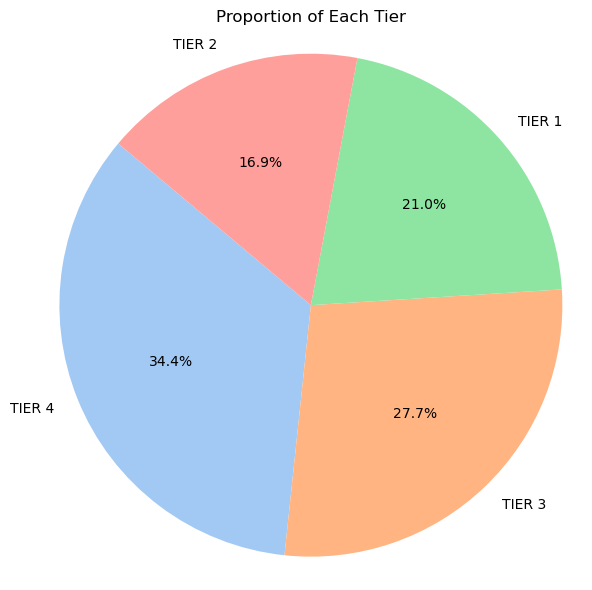

In [71]:
tier_counts = df['Tier'].value_counts(normalize=True)

# 创建饼图
plt.figure(figsize=(6, 6))
plt.title('Proportion of Each Tier')
plt.pie(tier_counts, labels=tier_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.axis('equal')  # 保证是一个正圆，而不是椭圆
plt.tight_layout()
plt.show()

In [72]:
def show_boxplot(dataname):
    plt.figure(figsize=(10, 5))

    # 繪製 Loan_Amount 的盒形圖
    plt.subplot(1, 4, 1)
    sns.boxplot(y=dataname['Loan_Amount'].dropna())
    plt.title('Loan Amount')
    plt.ylim(1000, 100000)

    # 繪製 Loan_Tenure 的盒形圖
    plt.subplot(1, 4, 2)
    sns.boxplot(y=dataname['Loan_Tenure'].dropna())
    plt.title('Loan Tenure')
    plt.ylim(0, 40)

    # 繪製 Age 的盒形圖
    plt.subplot(1, 4, 3)
    sns.boxplot(y=dataname['Age'].dropna())
    plt.title('Age')
    plt.ylim(0, 70)
    
    plt.subplot(1, 4, 4)
    sns.boxplot(y=dataname['Interest_Rate'].dropna())
    plt.title('Interest_Rate')
    plt.ylim(0, 22)
    
    # 顯示圖形
    plt.tight_layout()
    plt.show()

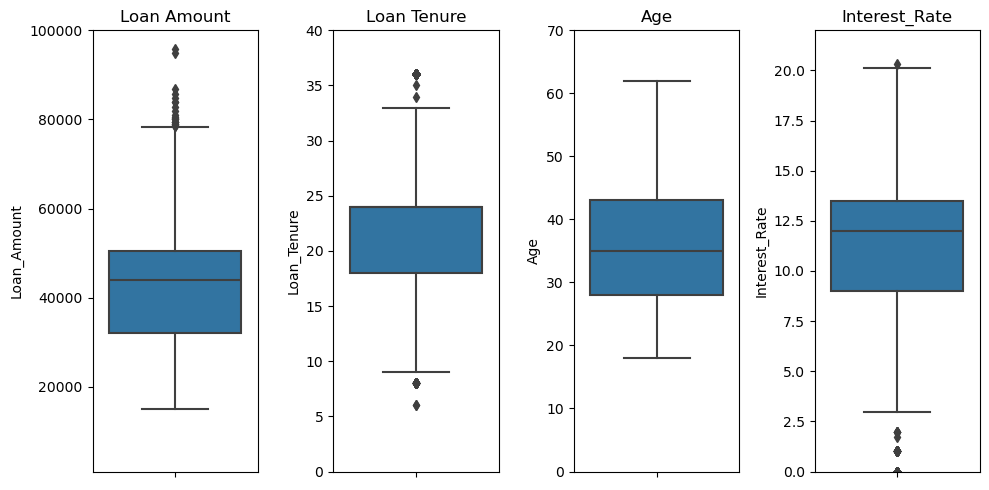

In [325]:
show_boxplot(data_1)

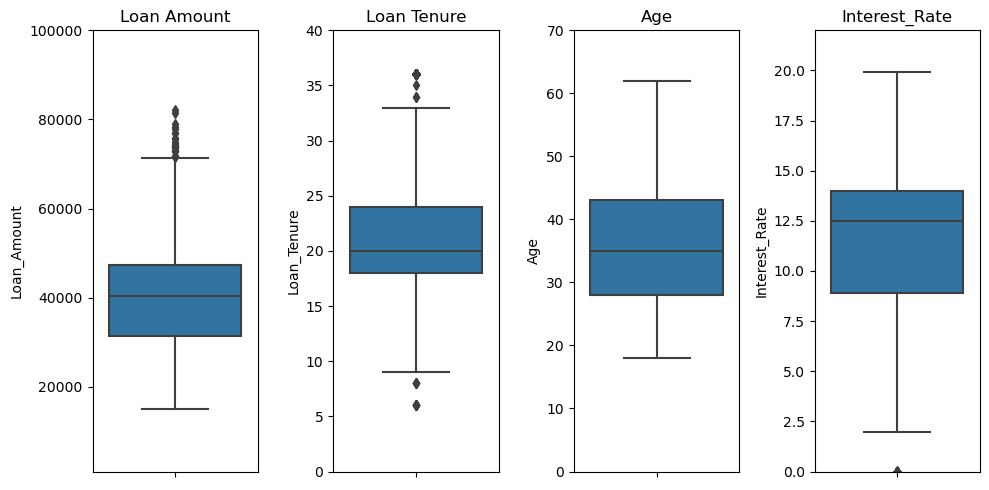

In [326]:
show_boxplot(data_2)

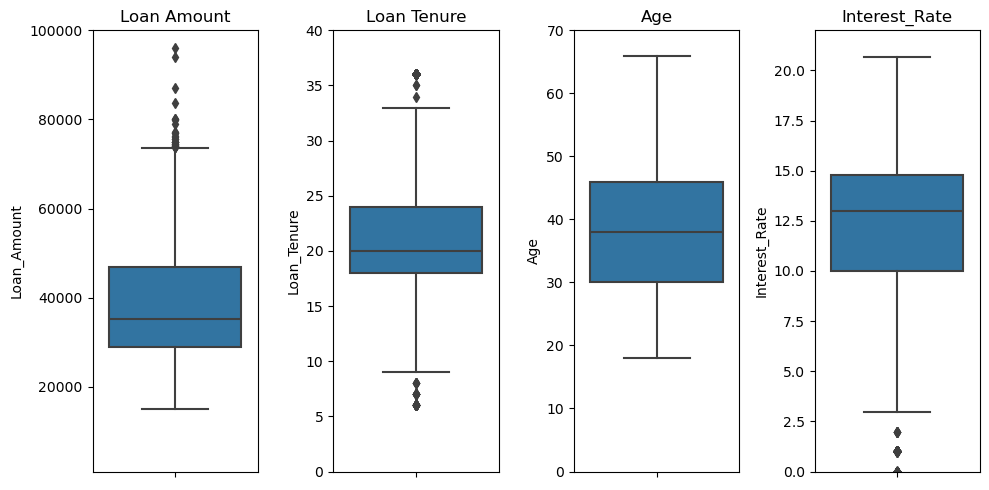

In [327]:
show_boxplot(data_3)

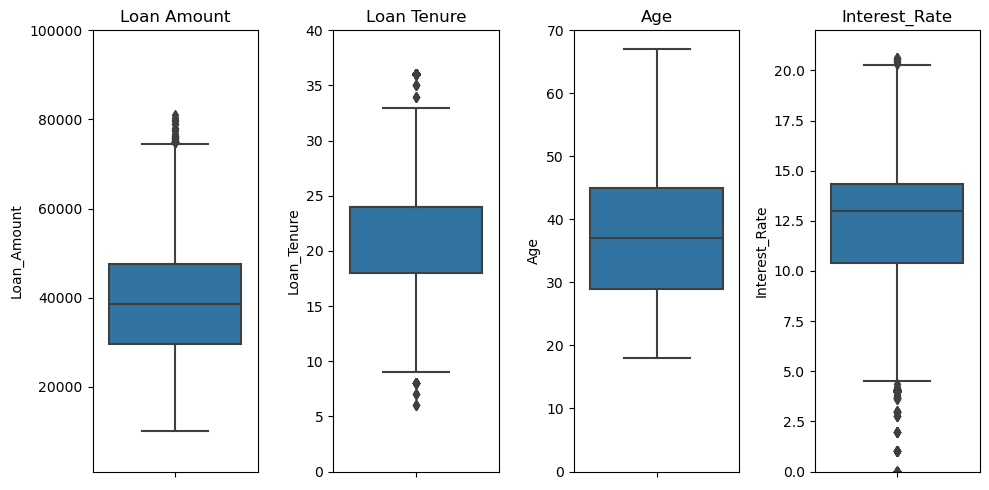

In [328]:
show_boxplot(data_4)

/var/folders/j1/fbnkytjn7kb6y_mjzpv7r0l40000gn/T/ipykernel_2471/2565154928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Employment_Type'] = pd.Categorical(data['Employment_Type'], categories=employment_type_order, ordered=True)
/var/folders/j1/fbnkytjn7kb6y_mjzpv7r0l40000gn/T/ipykernel_2471/2565154928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Employment_Type'] = pd.Categorical(data['Employment_Type'], categories=employment_type_order, ordered=True)
/var/folders/j1/fbnkytjn7kb6y_

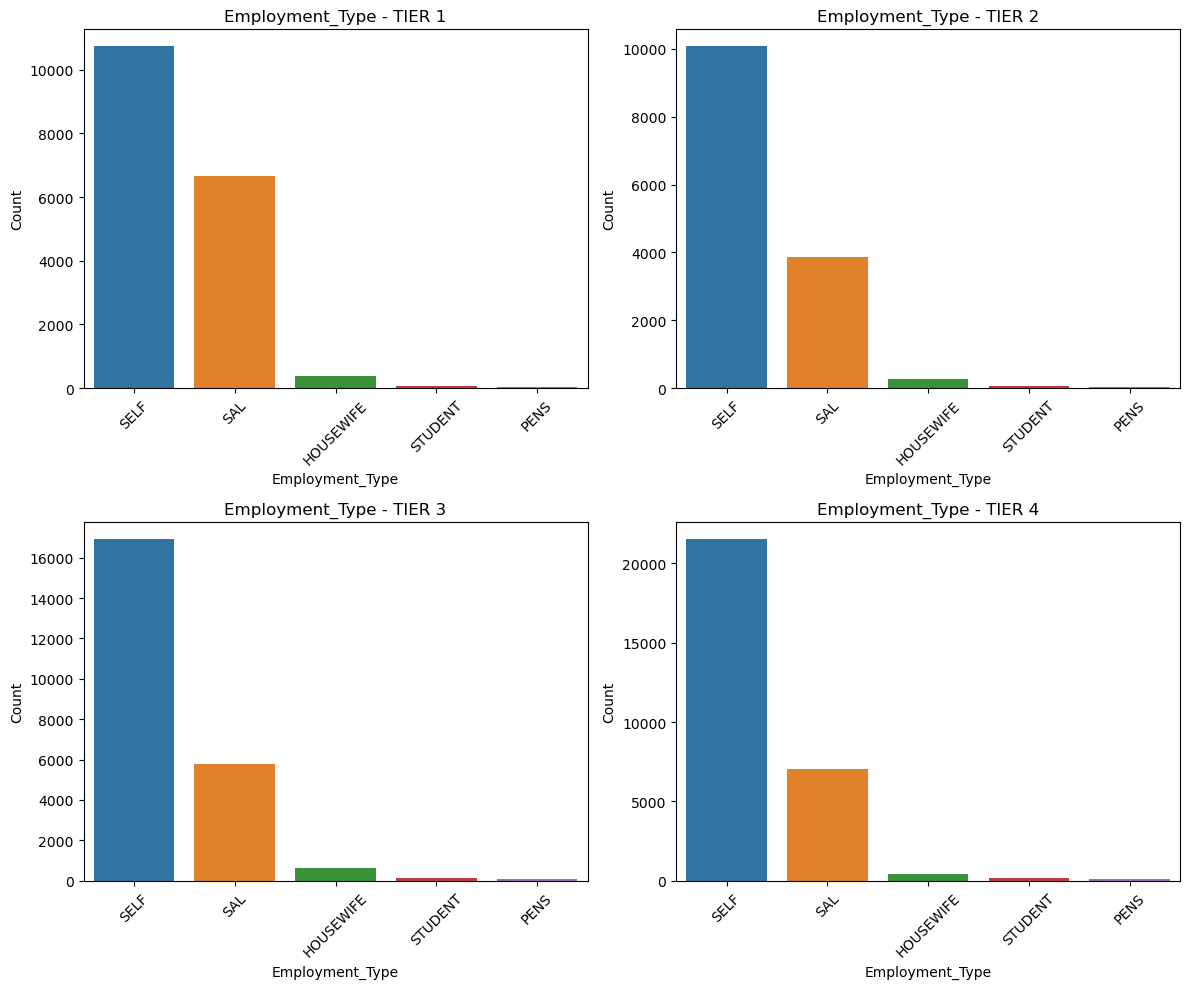

In [73]:
employment_type_order = ['SELF', 'SAL', 'HOUSEWIFE', 'STUDENT', 'PENS']  


for data in [data_1, data_2, data_3, data_4]:
    data['Employment_Type'] = pd.Categorical(data['Employment_Type'], categories=employment_type_order, ordered=True)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))


datasets = [(data_1, 'TIER 1'), (data_2, 'TIER 2'), (data_3, 'TIER 3'), (data_4, 'TIER 4')]

for i, (data, tier) in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    sns.countplot(x='Employment_Type', data=data, ax=ax, order=employment_type_order)
    ax.set_title(f'Employment_Type - {tier}')
    ax.set_xlabel('Employment_Type')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

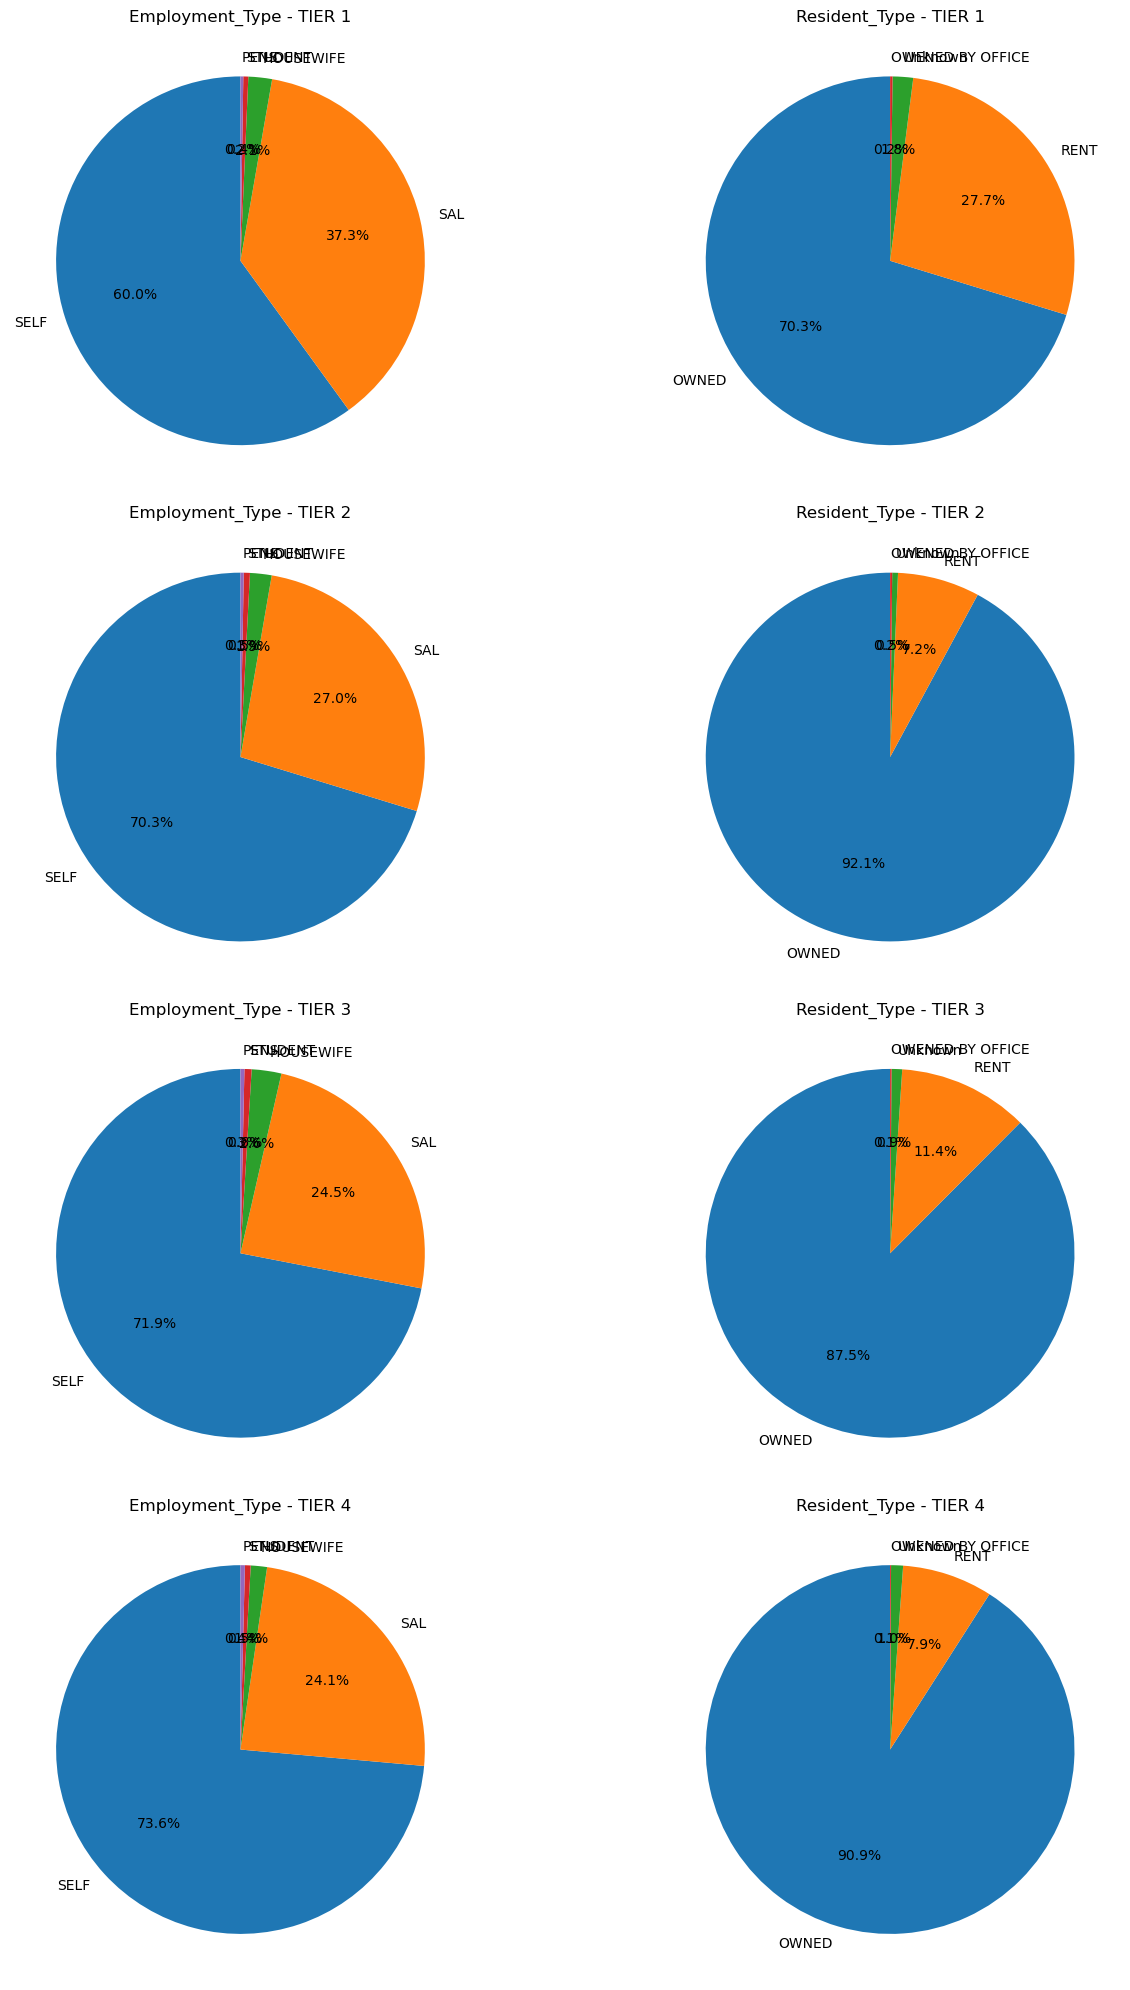

In [7]:
import matplotlib.pyplot as plt

def plot_pie_charts(data, column, title, ax):
    counts = data[column].value_counts()
    labels = counts.index
    sizes = counts.values
    
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(title)

fig, axs = plt.subplots(4, 2, figsize=(15, 20))

datasets = [(data_1, 'TIER 1'), (data_2, 'TIER 2'), (data_3, 'TIER 3'), (data_4, 'TIER 4')]

for i, (data, tier) in enumerate(datasets):
    plot_pie_charts(data, 'Employment_Type', f'Employment_Type - {tier}', axs[i, 0])
    
    plot_pie_charts(data, 'Resident_Type', f'Resident_Type - {tier}', axs[i, 1])

plt.tight_layout()
plt.show()

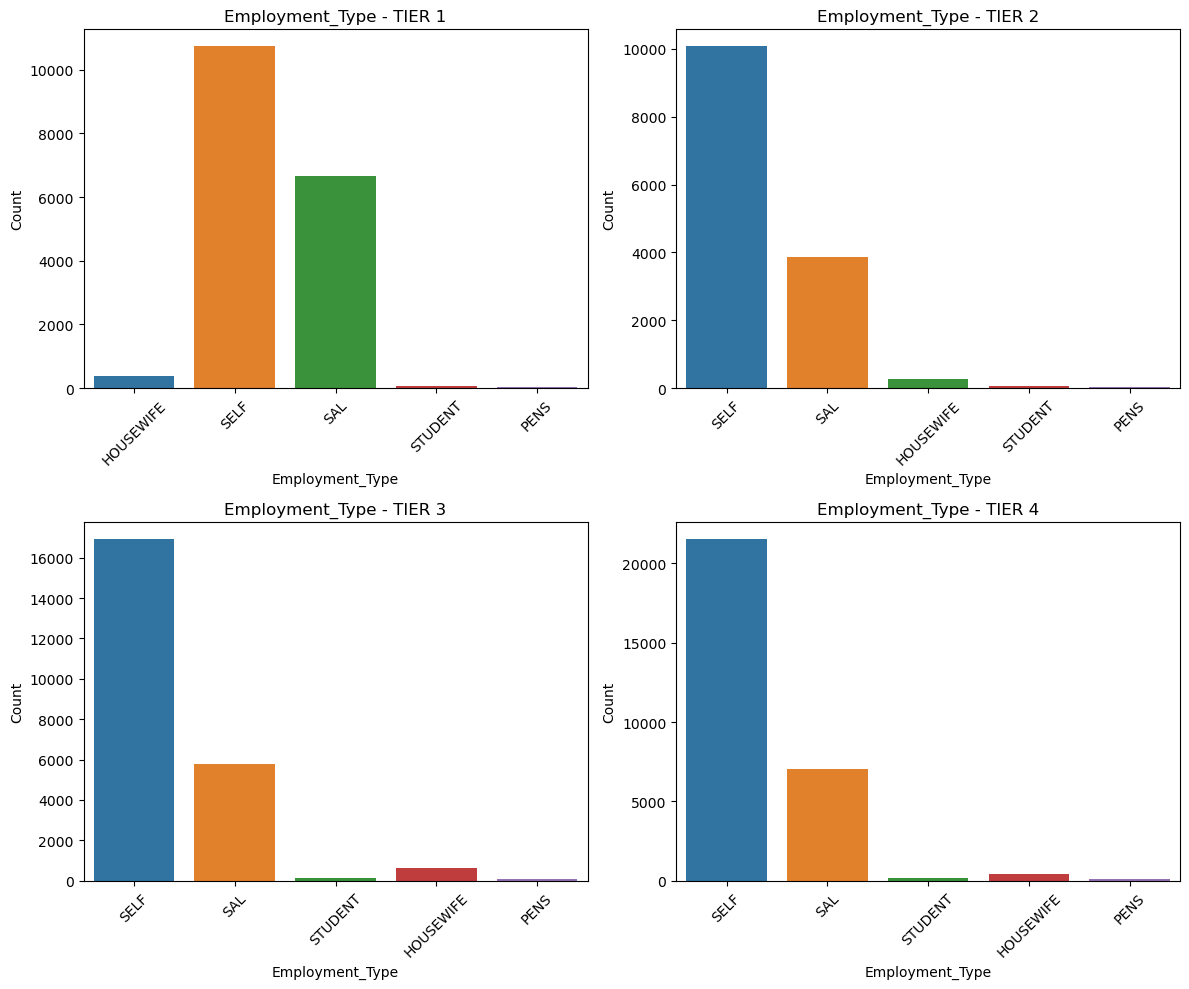

In [5]:
# data_1.info() # Employment_Type, Resident_Type 繪製長條圖 # Loan_Amount, Loan_Tenure, Age
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 資料集與對應的標題
datasets = [(data_1, 'TIER 1'), (data_2, 'TIER 2'), (data_3, 'TIER 3'), (data_4, 'TIER 4')]

for i, (data, tier) in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # 繪製 Employment_Type 的長條圖
    sns.countplot(x='Employment_Type', data=data, ax=ax)
    ax.set_title(f'Employment_Type - {tier}')
    ax.set_xlabel('Employment_Type')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # 旋轉 x 軸標籤使其更清晰

# 調整子圖表的間距
plt.tight_layout()
plt.show()

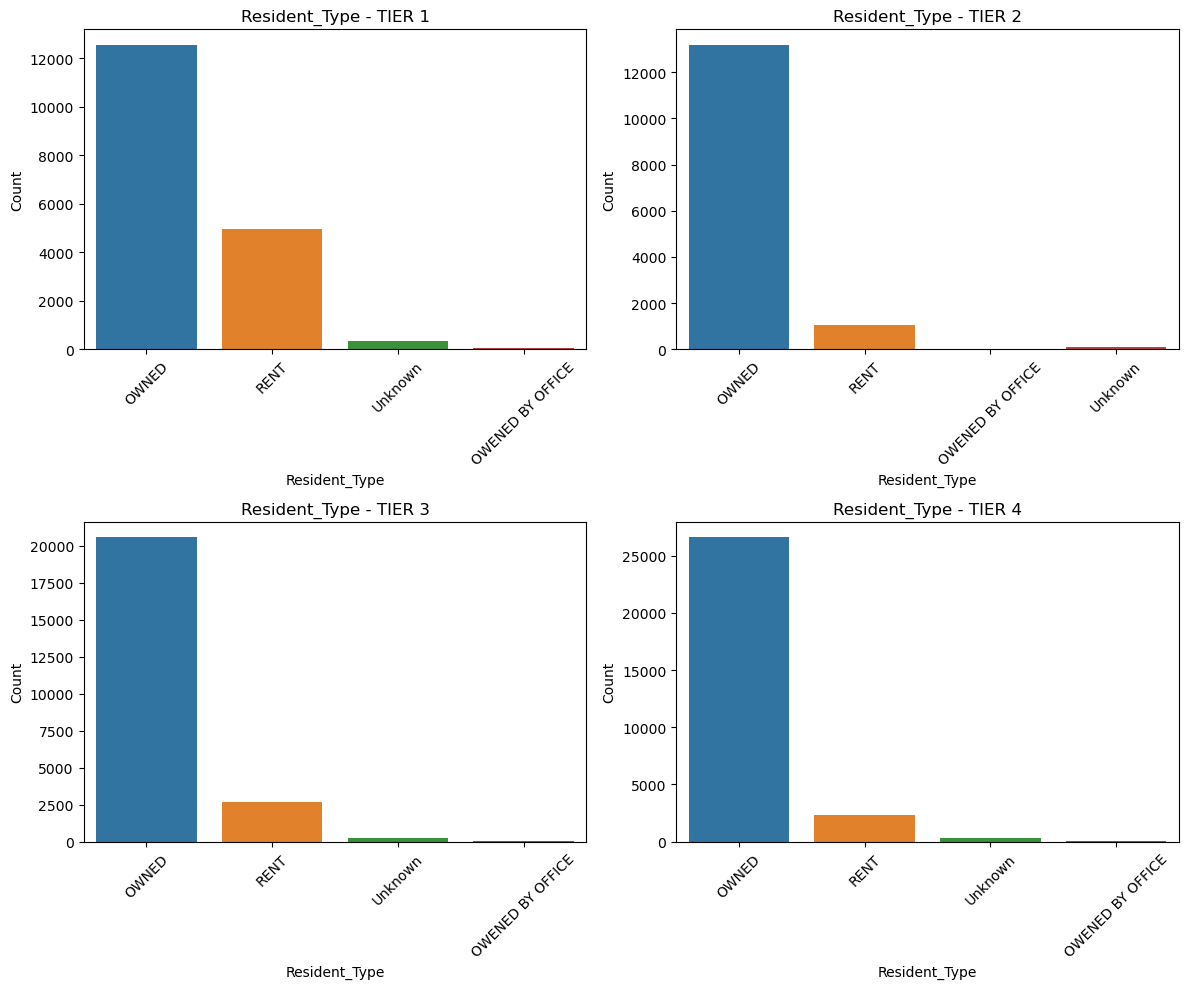

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 資料集與對應的標題
datasets = [(data_1, 'TIER 1'), (data_2, 'TIER 2'), (data_3, 'TIER 3'), (data_4, 'TIER 4')]

for i, (data, tier) in enumerate(datasets):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # 繪製 Employment_Type 的長條圖
    sns.countplot(x='Resident_Type', data=data, ax=ax)
    ax.set_title(f'Resident_Type - {tier}')
    ax.set_xlabel('Resident_Type')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # 旋轉 x 軸標籤使其更清晰

# 調整子圖表的間距
plt.tight_layout()
plt.show()

## 1. Decision Tree

In [74]:
def dt_model(data):
    # 分割特徵和標籤
    X = data.drop(['Target', 'Tier', 'Dealer_Code',  'Number_of_New_Loans_Last_3_Months'], axis=1)
    y = data['Target']
    X = pd.get_dummies(X, columns=['Two_Wheeler_Product_Code', 'Gender', 'Employment_Type', 'Resident_Type'],  dtype =int)

    
    # 分割訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # 使用 SMOTE 平衡樣本
    sm = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
    
    # 訓練模型
    model = DecisionTreeClassifier(random_state=42)
    # model = xgb_model(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 評估模型
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # 特徵重要性分析
    # 使用 feature_importances_ 呈現特徵重要性
    feature_importance = pd.DataFrame(model.feature_importances_, index=X_test.columns, columns=['Importance'])
    top_features = feature_importance['Importance'].sort_values(ascending=False).head(10)

    plt.figure(figsize=(8, 6))
    top_features.plot(kind='barh')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance (Top 10)')
    plt.gca().invert_yaxis()  # 顛倒 y 軸順序，讓重要性高的特徵在上面顯示
    plt.show()

    # 使用 permutation_importance 的圖表呈現特徵重要性
    dt_pfi = permutation_importance(model, X_test, y_test, scoring = recall_scorer,
                                n_repeats=20, random_state=48, n_jobs=-1)

    plt.figure(figsize=(8, 6))
    pd.Series(dt_pfi.importances_mean, index=X_test.columns).sort_values().plot.barh()
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Permutation Importance for each Feature')
    plt.show()

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5255
           1       0.07      0.15      0.10       113

    accuracy                           0.94      5368
   macro avg       0.53      0.55      0.53      5368
weighted avg       0.96      0.94      0.95      5368



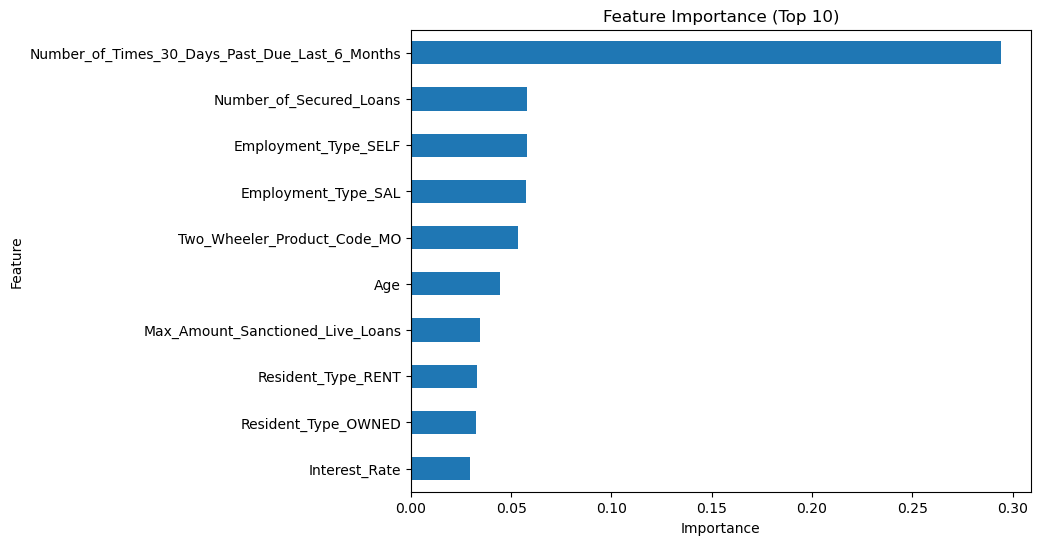

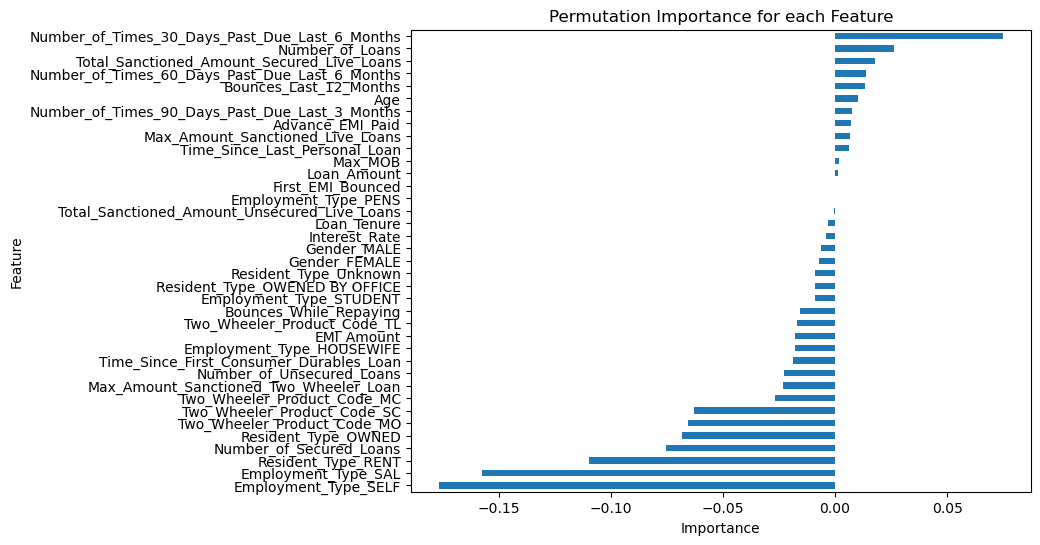

In [75]:
dt_model(data_1)

# 地區一模型—風險因子評估

In [77]:
from sklearn.tree import export_text

X = data_1.drop(['Target', 'Tier', 'Dealer_Code',  'Number_of_New_Loans_Last_3_Months'], axis=1)
y = data_1['Target']
X = pd.get_dummies(X, columns=['Two_Wheeler_Product_Code', 'Gender', 'Employment_Type', 'Resident_Type'],  dtype =int)

    
    # 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # 使用 SMOTE 平衡樣本
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
    
    # 訓練模型
model = DecisionTreeClassifier(random_state=42)
    # model = xgb_model(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

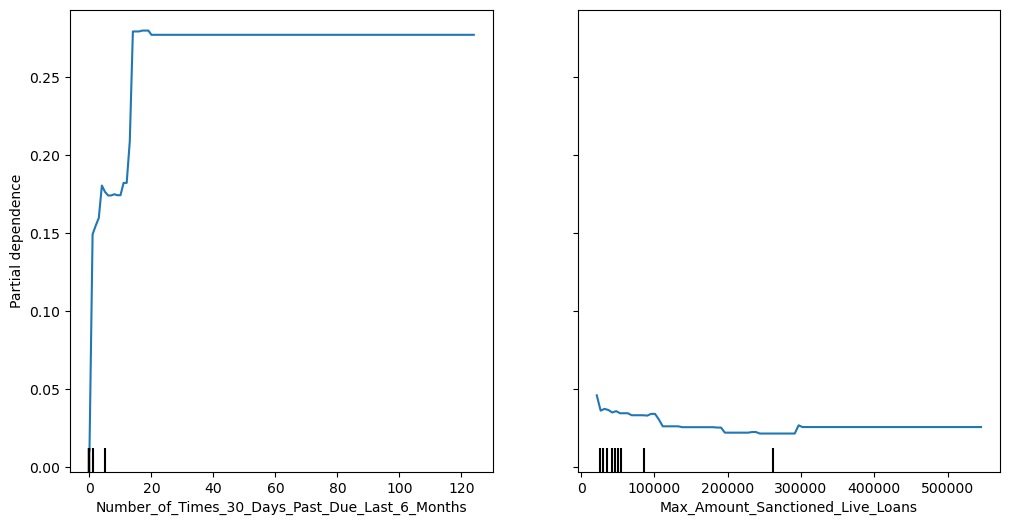

In [78]:
from sklearn.inspection import PartialDependenceDisplay

# 選擇重要特徵
important_features = ['Number_of_Times_30_Days_Past_Due_Last_6_Months',
'Max_Amount_Sanctioned_Live_Loans']

# 繪製PDP
fig, ax = plt.subplots(figsize=(12, 6))
display = PartialDependenceDisplay.from_estimator(model, X_train, features=important_features, ax=ax)
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4139
           1       0.16      0.25      0.19       161

    accuracy                           0.92      4300
   macro avg       0.56      0.60      0.58      4300
weighted avg       0.94      0.92      0.93      4300



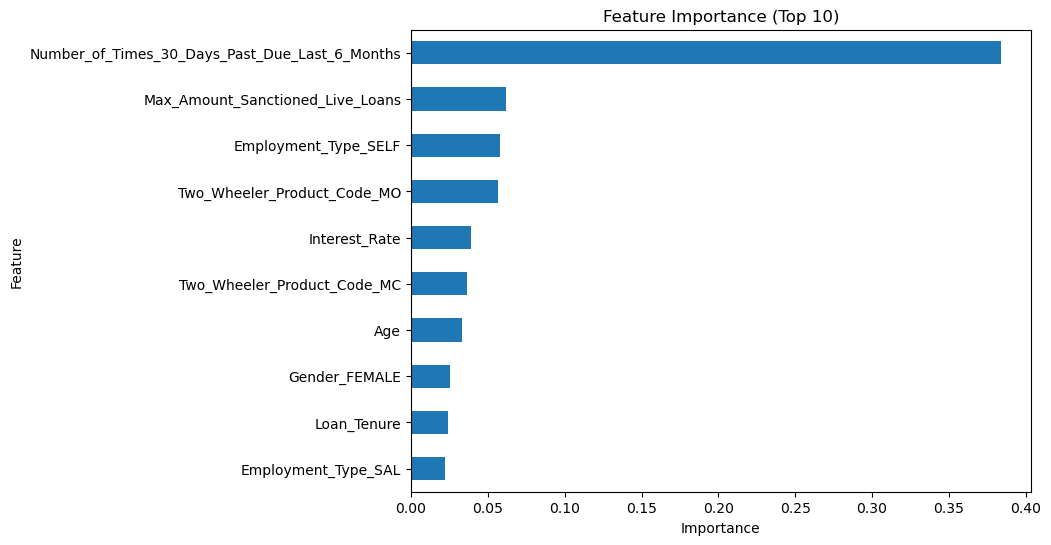

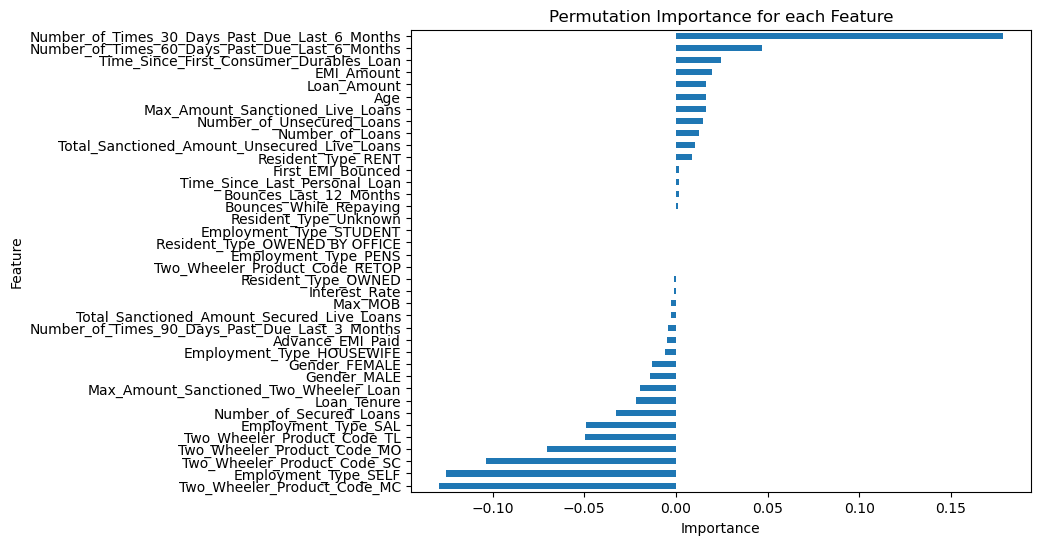

In [79]:
dt_model(data_2)

# 地區二模型—風險因子評估

In [80]:
X = data_2.drop(['Target', 'Tier', 'Dealer_Code',  'Number_of_New_Loans_Last_3_Months'], axis=1)
y = data_2['Target']
X = pd.get_dummies(X, columns=['Two_Wheeler_Product_Code', 'Gender', 'Employment_Type', 'Resident_Type'],  dtype =int)

    
    # 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # 使用 SMOTE 平衡樣本
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
    
    # 訓練模型
model = DecisionTreeClassifier(random_state=42)
    # model = xgb_model(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

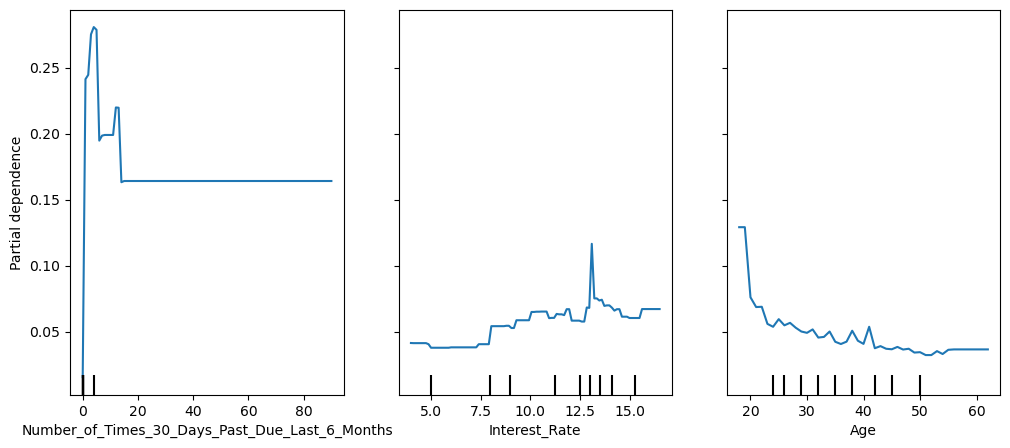

In [81]:
important_features = ['Number_of_Times_30_Days_Past_Due_Last_6_Months',
'Interest_Rate','Age']

# 绘制部分依赖图
fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(model, X_train, features=important_features, ax=ax)
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6945
           1       0.06      0.14      0.09       116

    accuracy                           0.95      7061
   macro avg       0.52      0.55      0.53      7061
weighted avg       0.97      0.95      0.96      7061



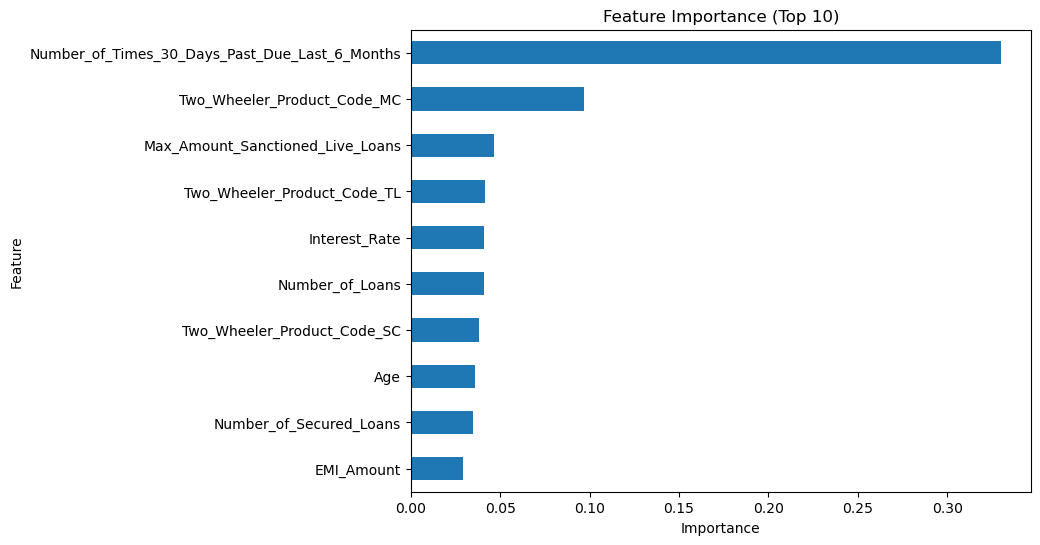

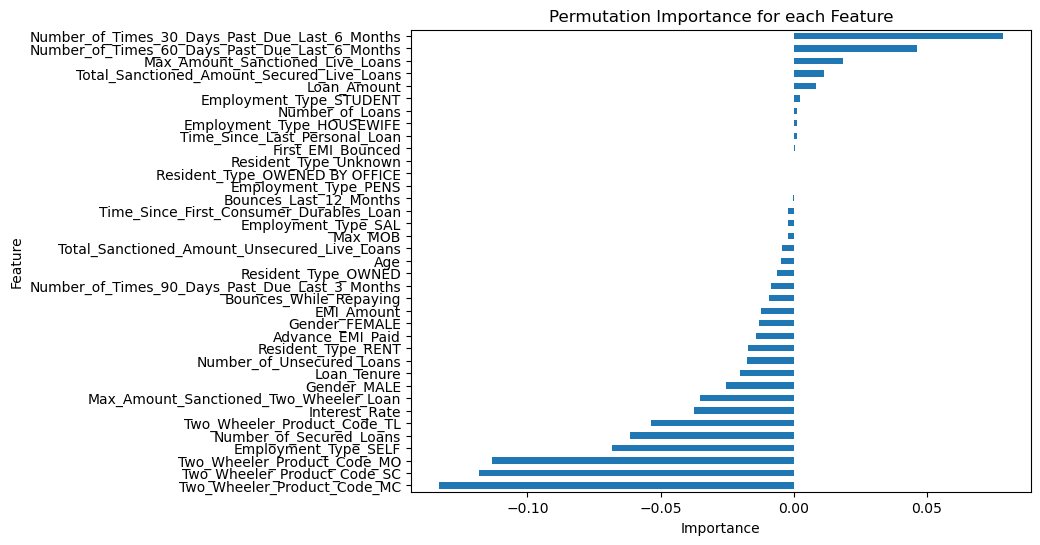

In [82]:
dt_model(data_3)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8620
           1       0.07      0.15      0.09       167

    accuracy                           0.94      8787
   macro avg       0.53      0.55      0.53      8787
weighted avg       0.97      0.94      0.95      8787



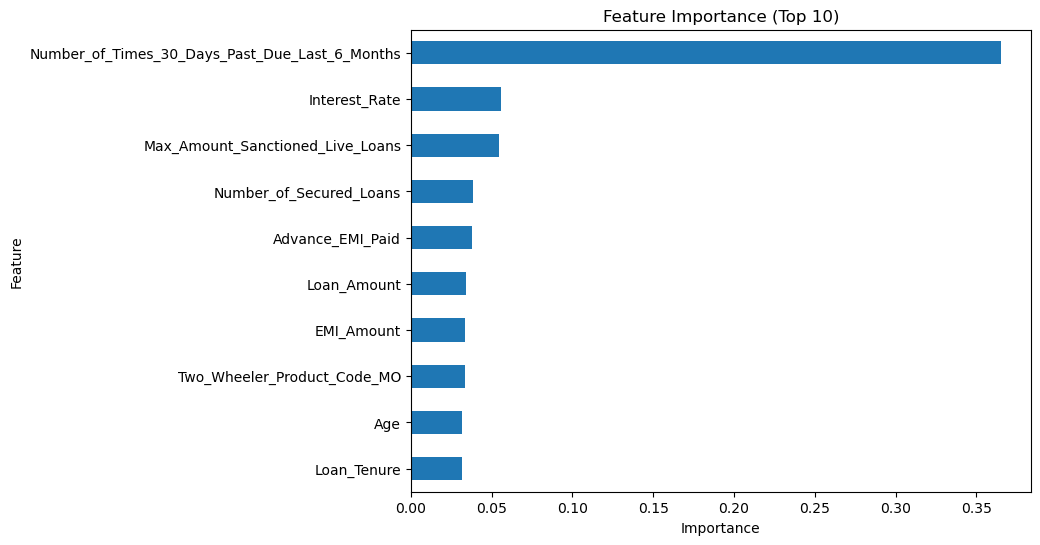

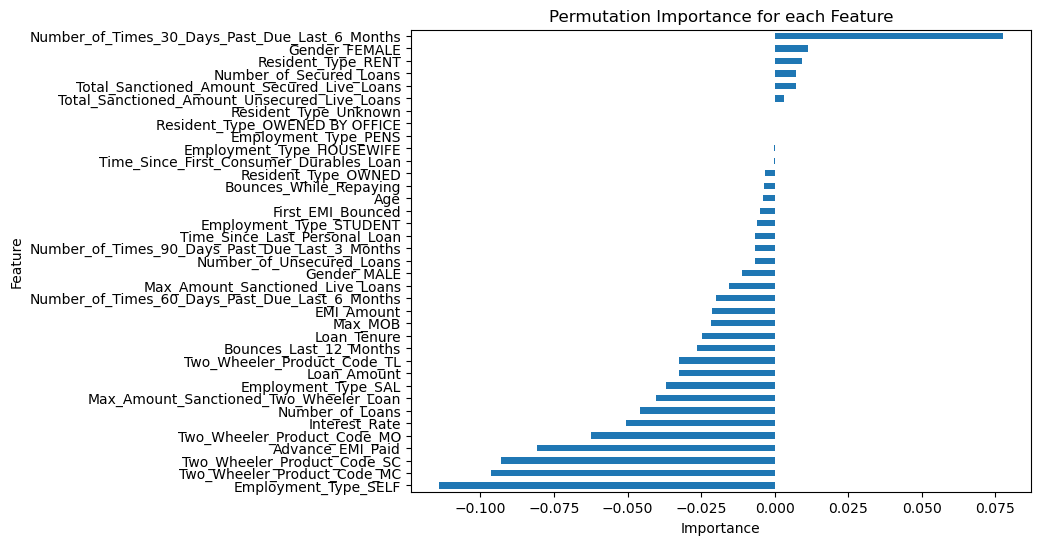

In [83]:
dt_model(data_4)

## 2. Random Forest

In [84]:
def rf_model(data):
    # 分割特徵和標籤
    X = data.drop(['Target', 'Tier', 'Dealer_Code', 'Number_of_New_Loans_Last_3_Months'], axis=1)
    y = data['Target']
    X = pd.get_dummies(X, columns=['Two_Wheeler_Product_Code', 'Gender', 'Employment_Type', 'Resident_Type'],  dtype =int)

    
    # 分割訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
    
    # 使用 SMOTE 平衡樣本
    sm = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
    
    # 訓練模型
    model = RandomForestClassifier()
    # model = xgb_model(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 評估模型
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # 特徵重要性分析
    # 使用 feature_importances_ 呈現特徵重要性
    feature_importance = pd.DataFrame(model.feature_importances_, index=X_test.columns, columns=['Importance'])
    top_features = feature_importance['Importance'].sort_values(ascending=False).head(10)

    plt.figure(figsize=(8, 6))
    top_features.plot(kind='barh')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance (Top 10)')
    plt.gca().invert_yaxis()  # 顛倒 y 軸順序，讓重要性高的特徵在上面顯示
    plt.show()

    # 使用 permutation_importance 的圖表呈現特徵重要性
    rf_pfi = permutation_importance(model, X_test, y_test, scoring = recall_scorer,
                                    n_repeats=20, random_state=48, n_jobs=-1)

    plt.figure(figsize=(8, 6))
    pd.Series(rf_pfi.importances_mean, index=X_test.columns).sort_values().plot.barh()
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Permutation Importance for each Feature')
    plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5255
           1       0.24      0.10      0.14       113

    accuracy                           0.97      5368
   macro avg       0.61      0.55      0.56      5368
weighted avg       0.97      0.97      0.97      5368



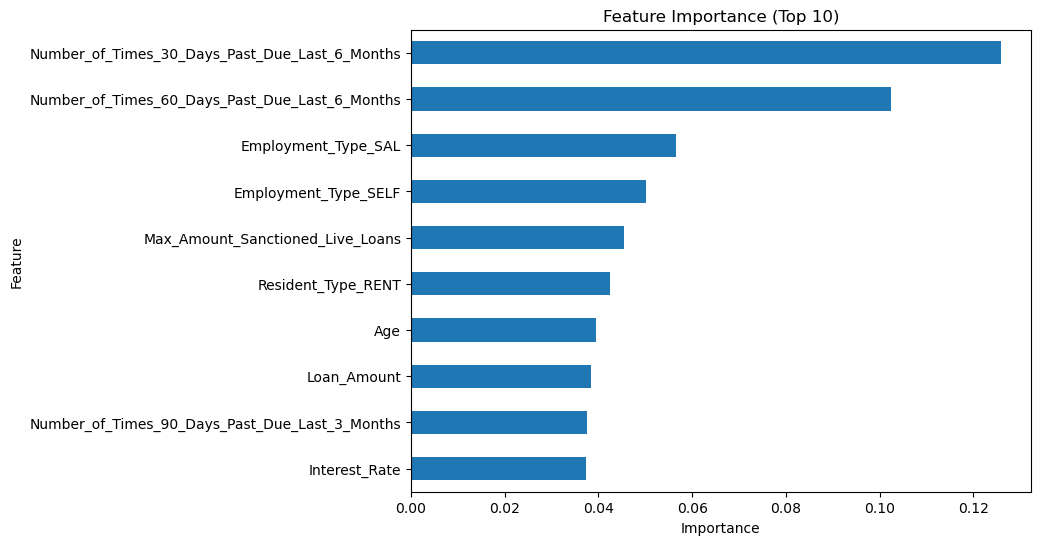

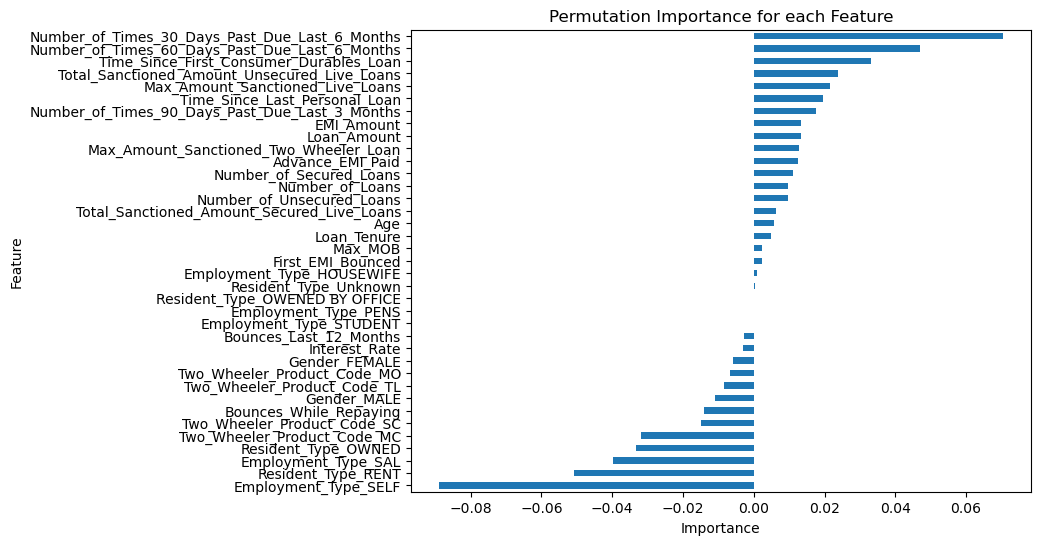

In [85]:
rf_model(data_1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4139
           1       0.26      0.17      0.21       161

    accuracy                           0.95      4300
   macro avg       0.61      0.58      0.59      4300
weighted avg       0.94      0.95      0.95      4300



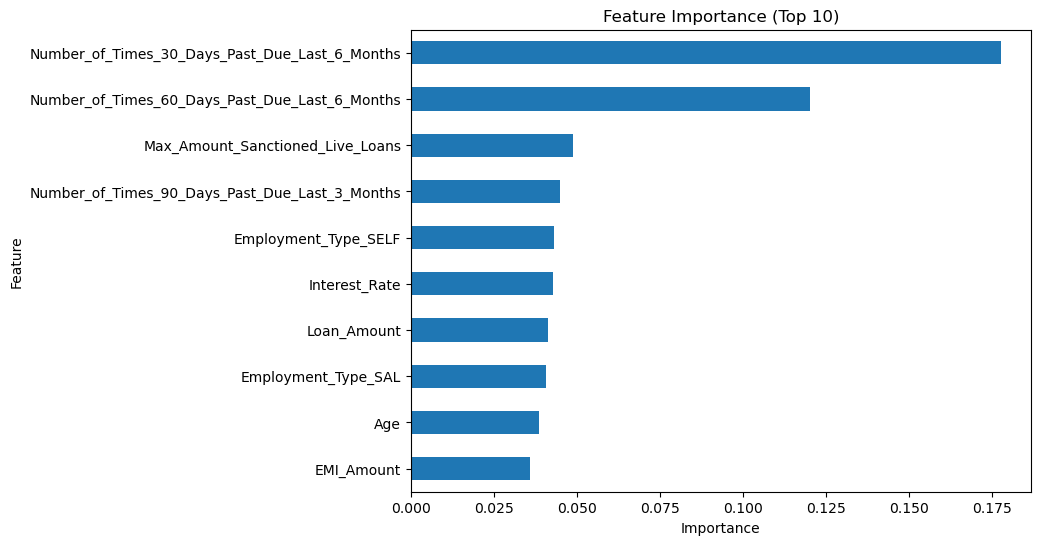

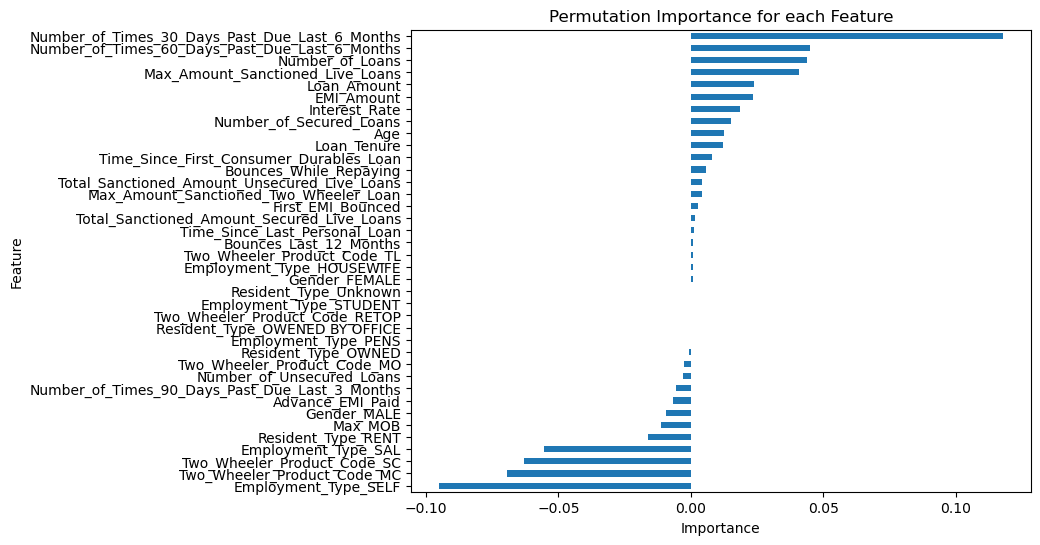

In [86]:
rf_model(data_2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6945
           1       0.17      0.14      0.15       116

    accuracy                           0.97      7061
   macro avg       0.58      0.56      0.57      7061
weighted avg       0.97      0.97      0.97      7061



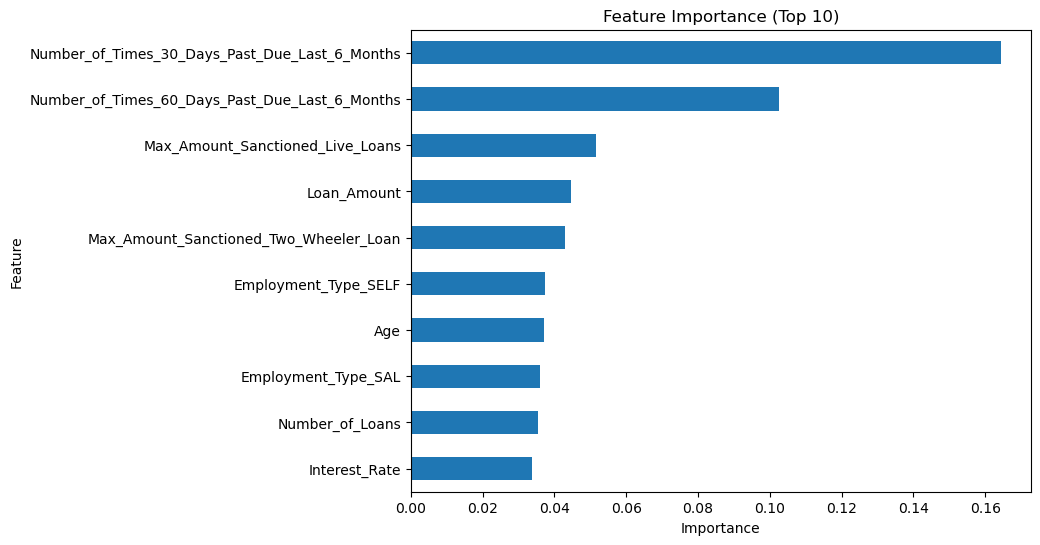

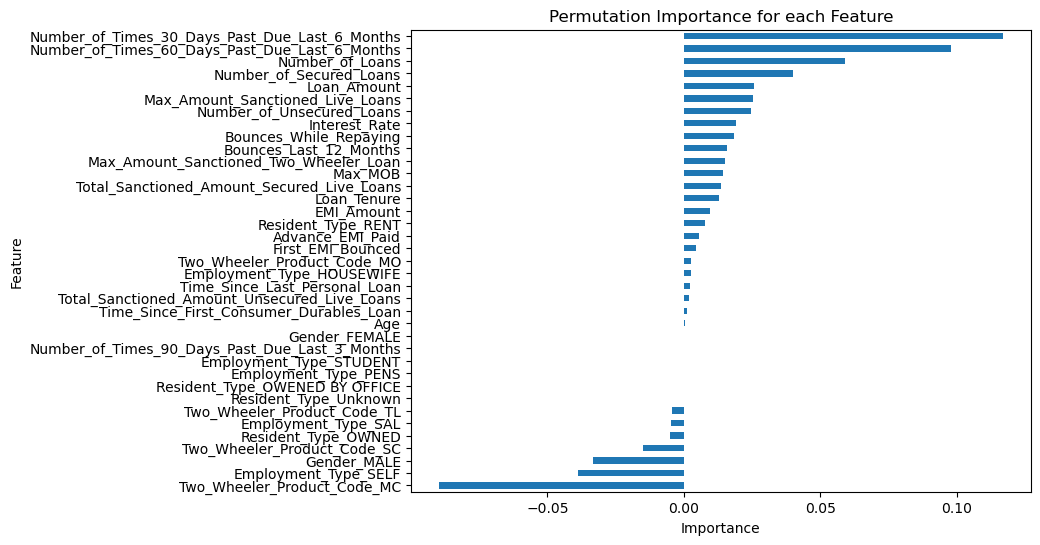

In [87]:
rf_model(data_3)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8620
           1       0.15      0.11      0.12       167

    accuracy                           0.97      8787
   macro avg       0.56      0.55      0.55      8787
weighted avg       0.97      0.97      0.97      8787



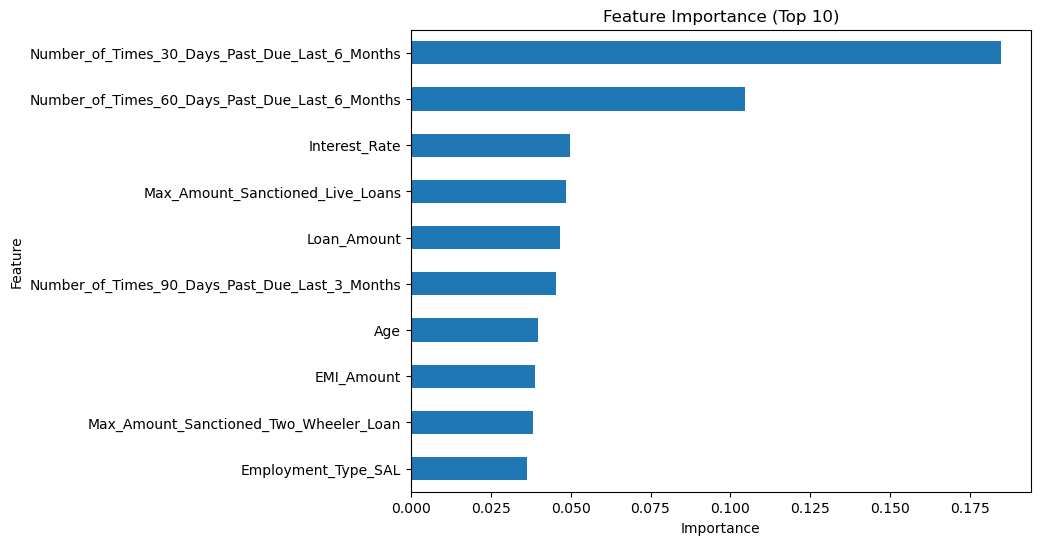

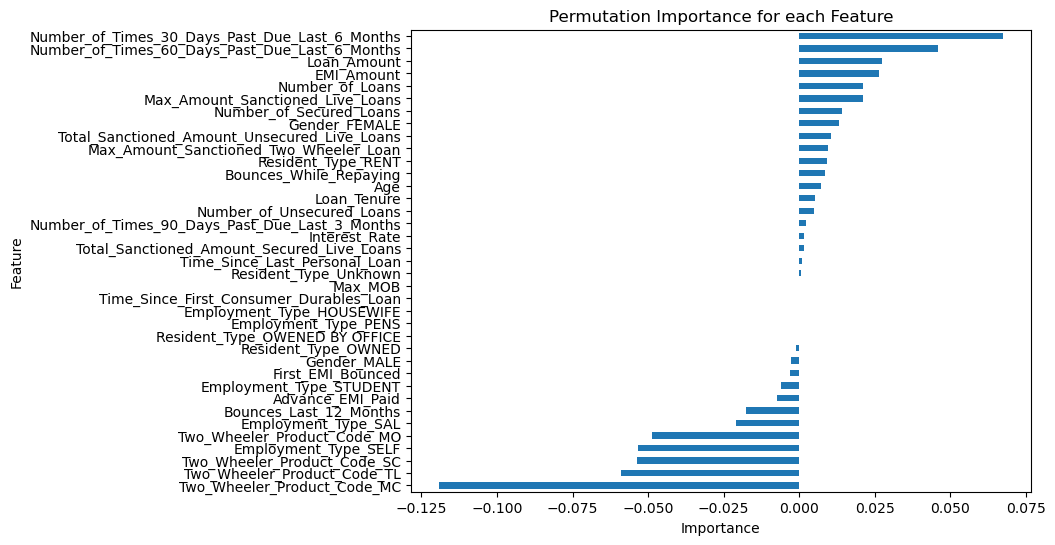

In [88]:
rf_model(data_4)

In [89]:
def process_and_train(data):
    # 分割特徵和標籤
    X = data.drop(['Target', 'Tier', 'Dealer_Code', 'Number_of_New_Loans_Last_3_Months'], axis=1)
    y = data['Target']
    X = pd.get_dummies(X, columns=['Two_Wheeler_Product_Code', 'Gender', 'Employment_Type', 'Resident_Type'], dtype=int)

    # 分割訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
    
    # 使用 SMOTE 平衡樣本
    sm = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
    
    # 設置隨機森林模型和參數網格
    rf = RandomForestClassifier(random_state=42)
    rf_param_grid = {
        'n_estimators': np.arange(100, 450, 50),
        'max_depth': np.arange(5, 21, 5)
    }

    # 使用 GridSearchCV 進行參數搜索
    recall_scorer = make_scorer(recall_score, greater_is_better=True)
    rf_searcher = GridSearchCV(
        estimator=rf, 
        param_grid=rf_param_grid, 
        scoring=recall_scorer,
        cv=5,
        refit=True,
        n_jobs=-1
    )

    rf_searcher.fit(X_train_resampled, y_train_resampled)
    best_rf = rf_searcher.best_estimator_

    # 評估模型
    y_pred = best_rf.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # 特徵重要性分析 - 使用 feature_importances_
    feature_importance = pd.DataFrame(best_rf.feature_importances_, index=X_test.columns, columns=['Importance'])
    top_features = feature_importance['Importance'].sort_values(ascending=False).head(10)

    plt.figure(figsize=(8, 6))
    top_features.plot(kind='barh')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance (Top 10)')
    plt.gca().invert_yaxis()  # 顛倒 y 軸順序，讓重要性高的特徵在上面顯示
    plt.show()

    # 使用 permutation_importance 的圖表呈現特徵重要性
    rf_pfi = permutation_importance(best_rf, X_test, y_test, n_repeats=20,
                                    scoring = recall_scorer, random_state=42, n_jobs=-1)

    plt.figure(figsize=(8, 6))
    pd.Series(rf_pfi.importances_mean, index=X_test.columns).sort_values().plot.barh()
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Permutation Importance for each Feature')
    plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5255
           1       0.23      0.12      0.16       113

    accuracy                           0.97      5368
   macro avg       0.61      0.56      0.57      5368
weighted avg       0.97      0.97      0.97      5368



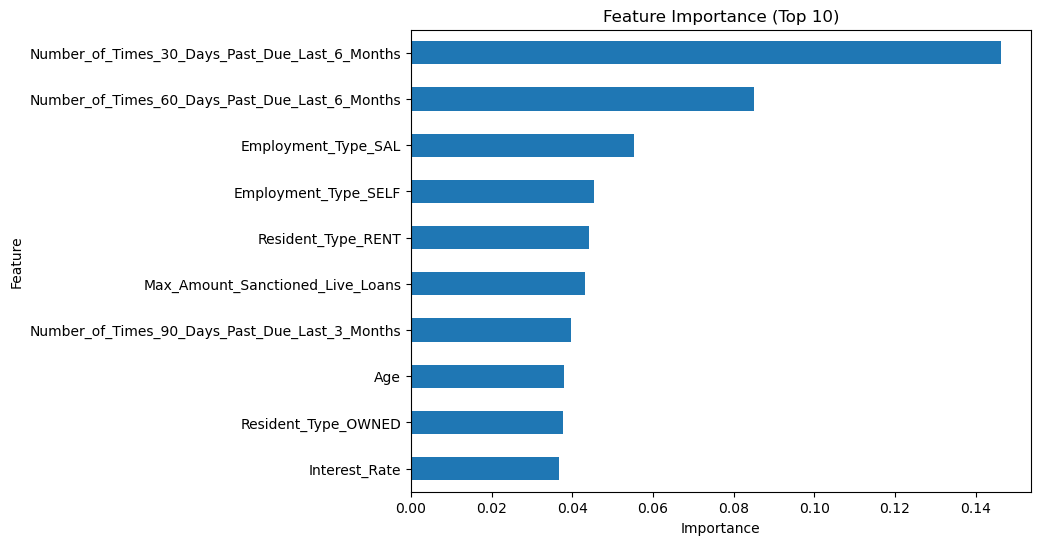

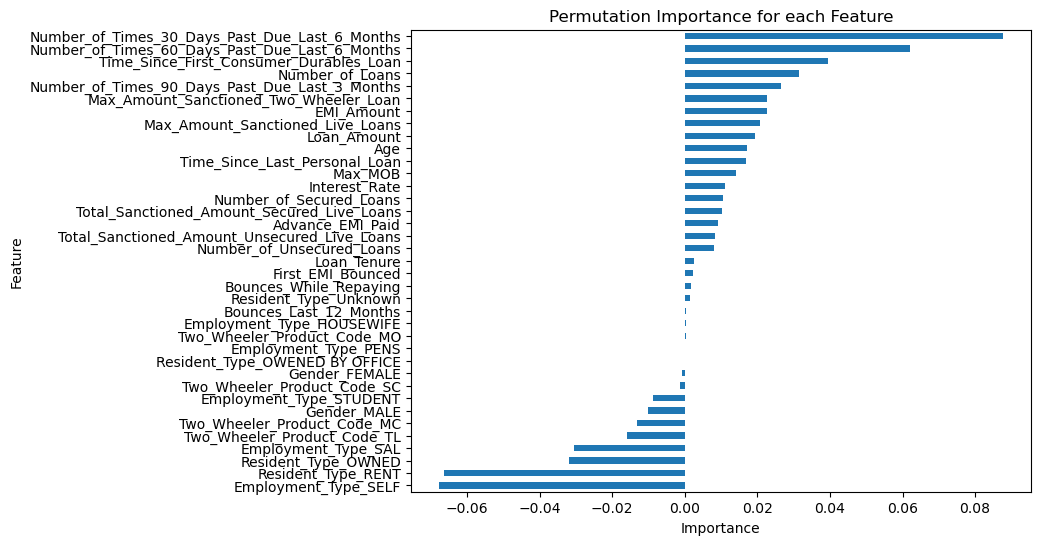

In [90]:
process_and_train(data_1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4139
           1       0.25      0.19      0.22       161

    accuracy                           0.95      4300
   macro avg       0.61      0.59      0.60      4300
weighted avg       0.94      0.95      0.94      4300



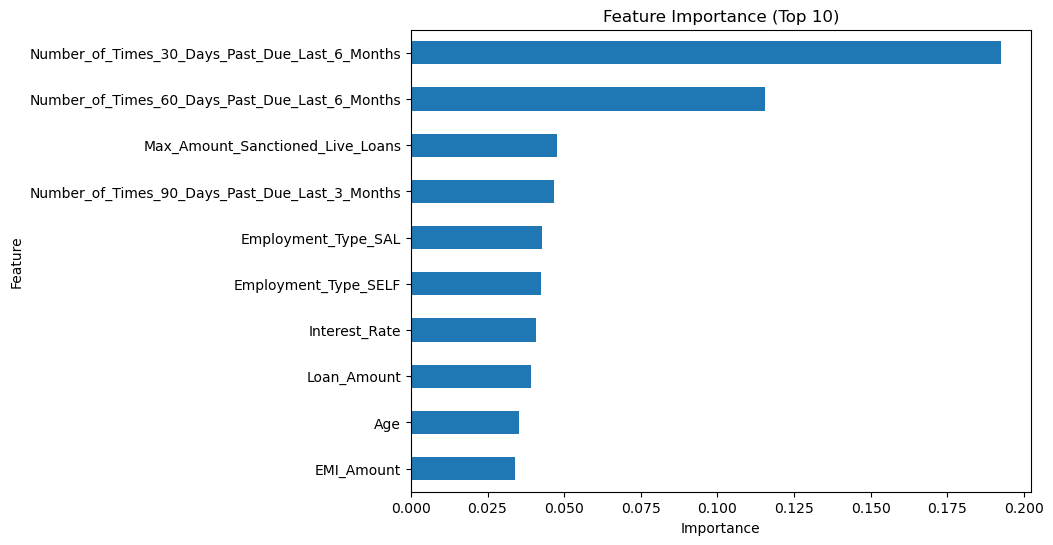

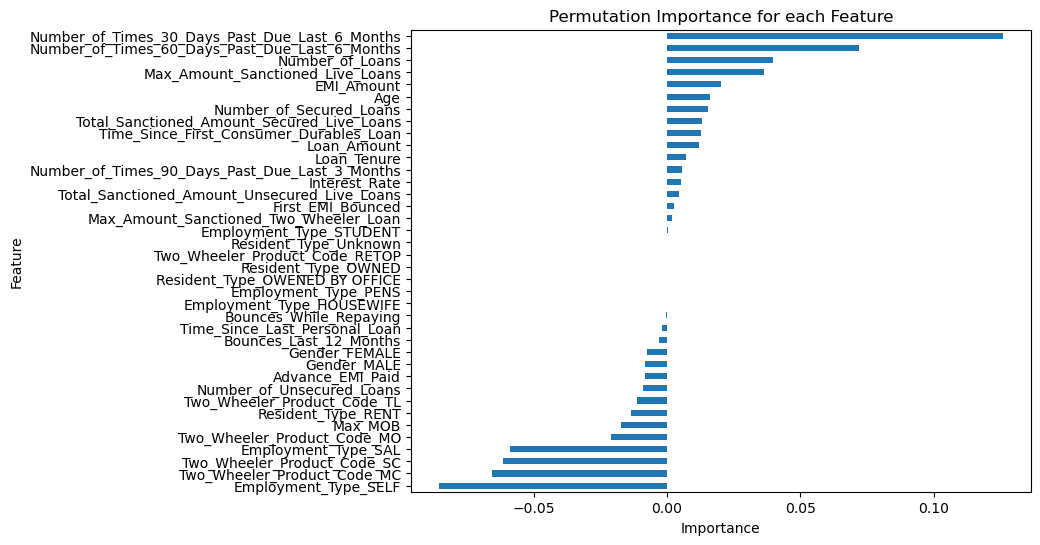

In [91]:
process_and_train(data_2)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6945
           1       0.16      0.18      0.17       116

    accuracy                           0.97      7061
   macro avg       0.57      0.58      0.58      7061
weighted avg       0.97      0.97      0.97      7061



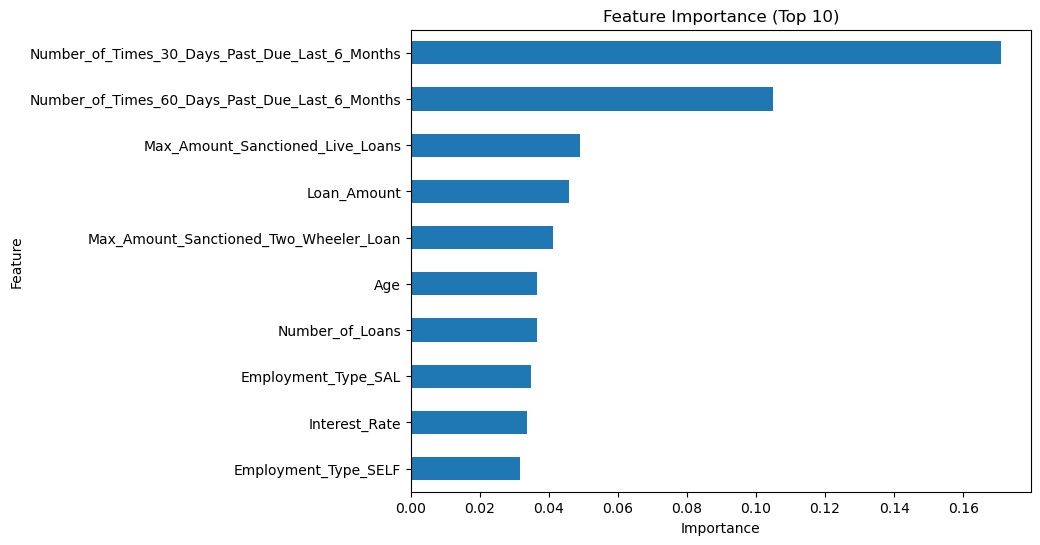

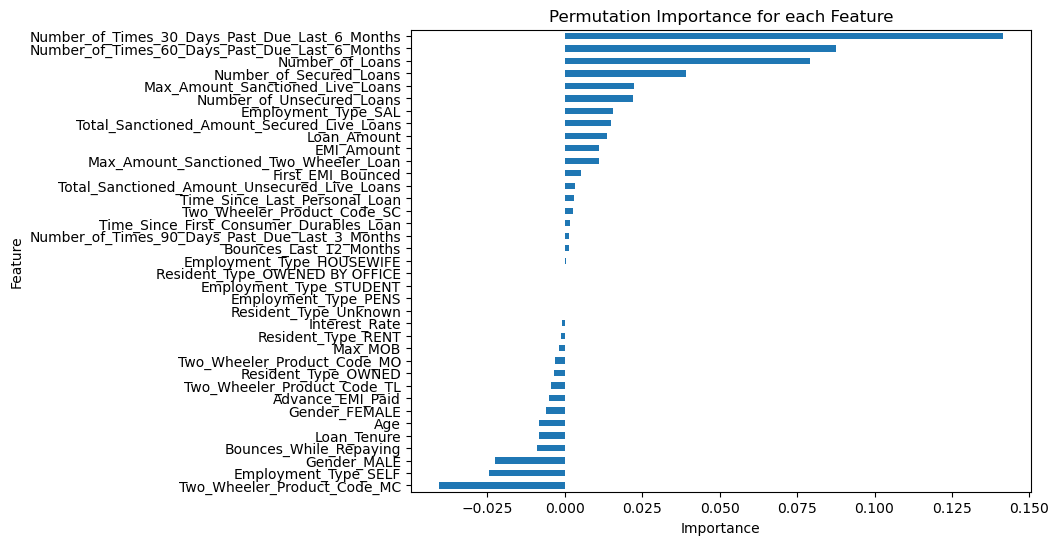

In [92]:
process_and_train(data_3)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8620
           1       0.16      0.20      0.18       167

    accuracy                           0.96      8787
   macro avg       0.57      0.59      0.58      8787
weighted avg       0.97      0.96      0.97      8787



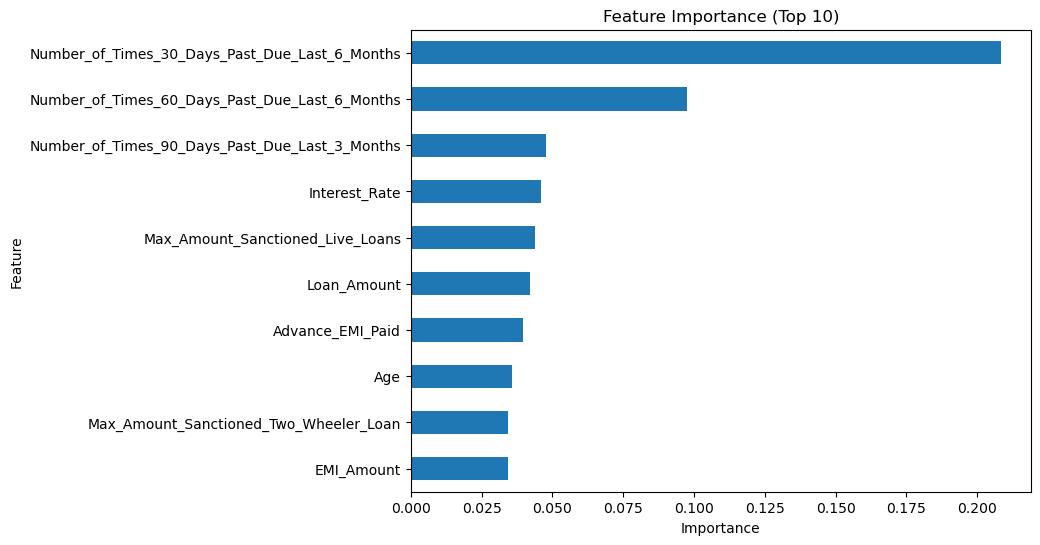

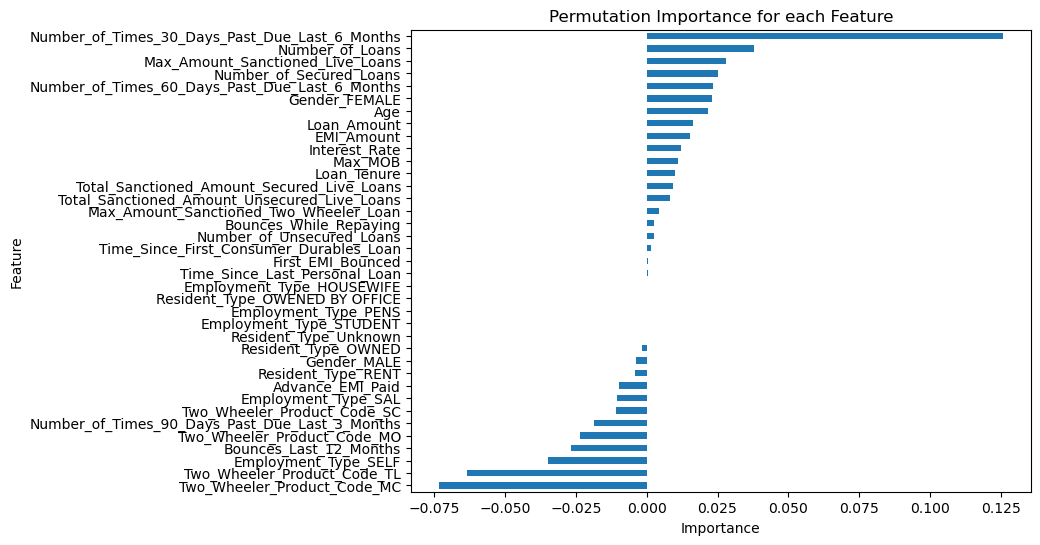

In [93]:
process_and_train(data_4)

## 3. XGboost Model

In [94]:
def xgboost_model(data):
    # 分割特徵和標籤
    X = data.drop(['Target', 'Tier', 'Dealer_Code', 'Number_of_New_Loans_Last_3_Months'], axis=1)
    y = data['Target']
    X = pd.get_dummies(X, columns=['Two_Wheeler_Product_Code', 'Gender', 'Employment_Type', 'Resident_Type'], dtype=int)

    # 分割訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
    
    # 使用 SMOTE 平衡樣本
    sm = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
    
    # 訓練模型
    model = xgb.XGBClassifier()
    # model = xgb_model(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    
    # 評估模型
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # 特徵重要性分析
    # SHAP summary plot
    explainer = shap.Explainer(model, X_train_resampled)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test)

    # XGBoost feature importance plot
    plt.figure(figsize=(10, 8))
    xgb.plot_importance(model, importance_type='weight', max_num_features=20)
    plt.title('Feature Importance')
    plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5255
           1       0.15      0.06      0.09       113

    accuracy                           0.97      5368
   macro avg       0.56      0.53      0.54      5368
weighted avg       0.96      0.97      0.97      5368



 94%|=================== | 5036/5368 [00:13<00:00]       

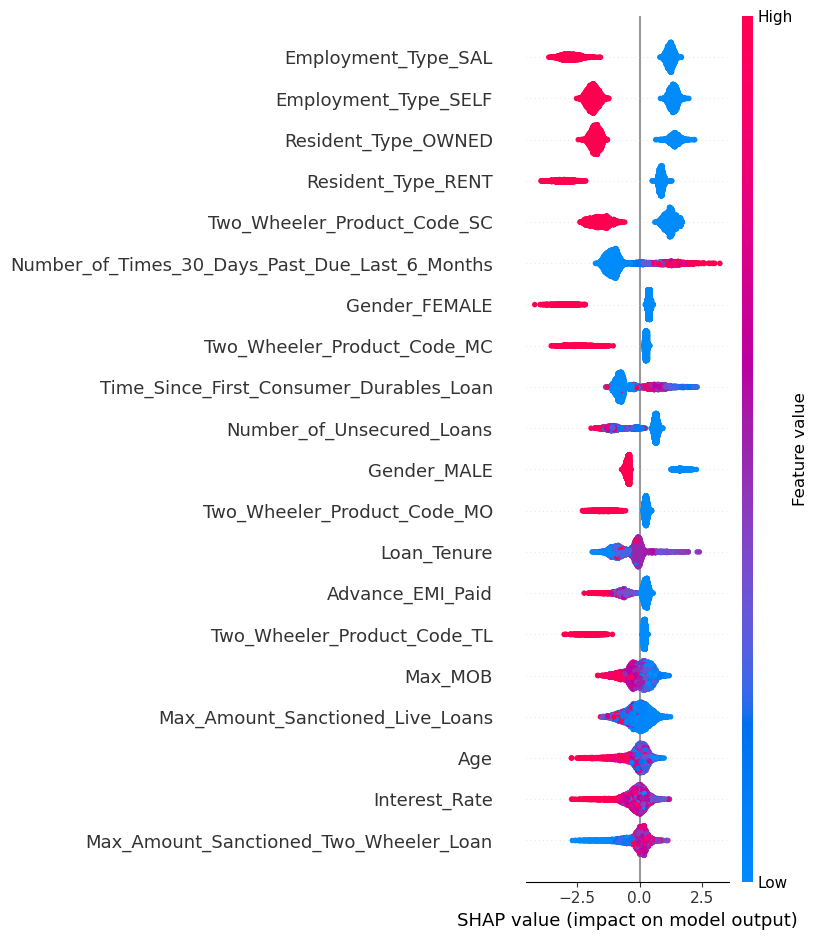

<Figure size 1000x800 with 0 Axes>

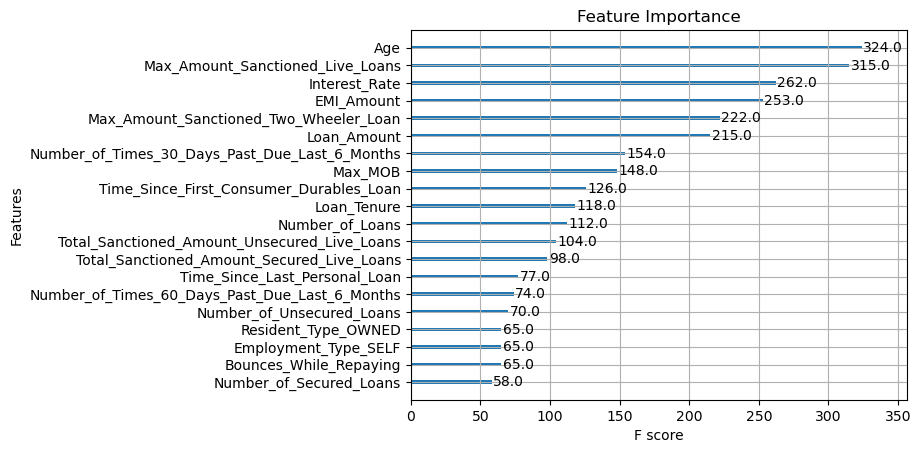

In [95]:
xgboost_model(data_1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4139
           1       0.25      0.16      0.20       161

    accuracy                           0.95      4300
   macro avg       0.61      0.57      0.59      4300
weighted avg       0.94      0.95      0.95      4300



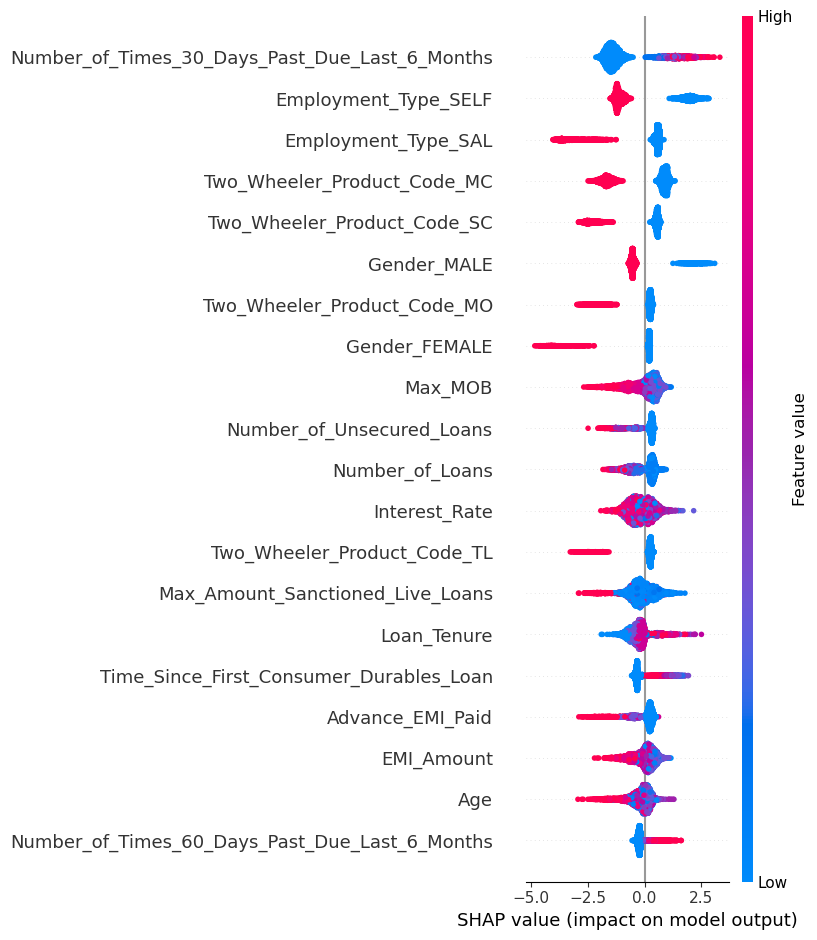

<Figure size 1000x800 with 0 Axes>

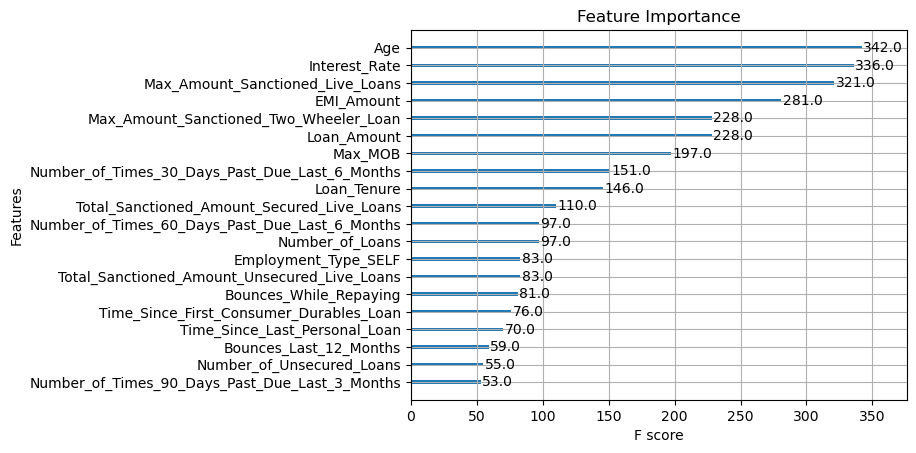

In [96]:
xgboost_model(data_2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6945
           1       0.16      0.13      0.14       116

    accuracy                           0.97      7061
   macro avg       0.57      0.56      0.56      7061
weighted avg       0.97      0.97      0.97      7061



 97%|=================== | 6823/7061 [00:17<00:00]       

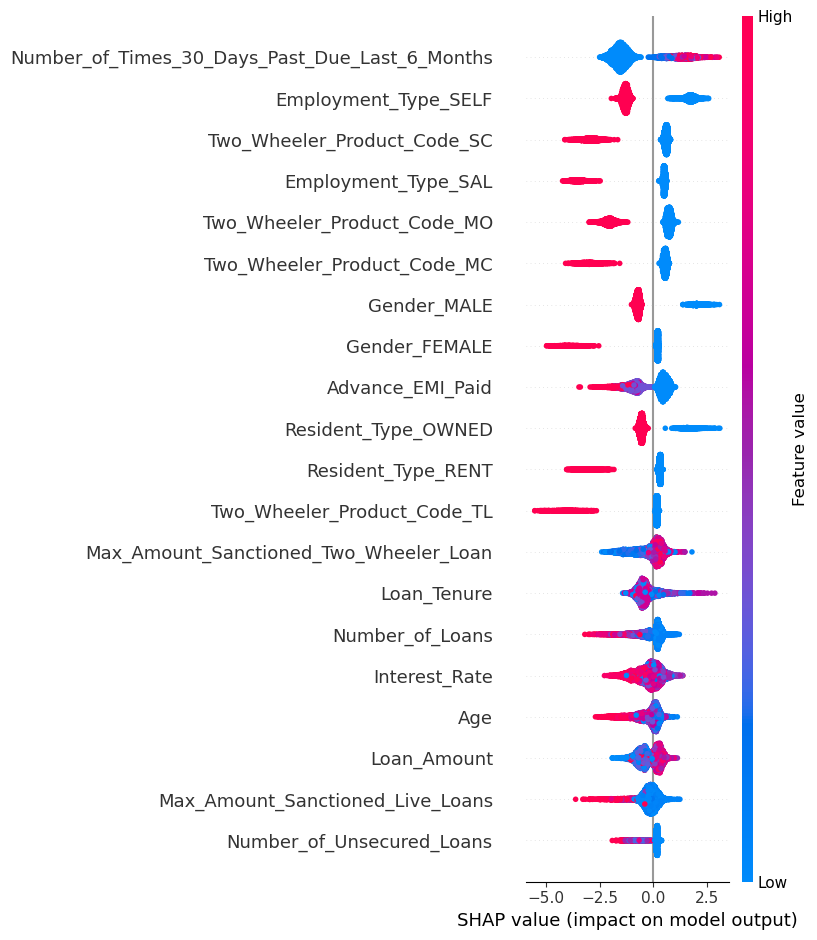

<Figure size 1000x800 with 0 Axes>

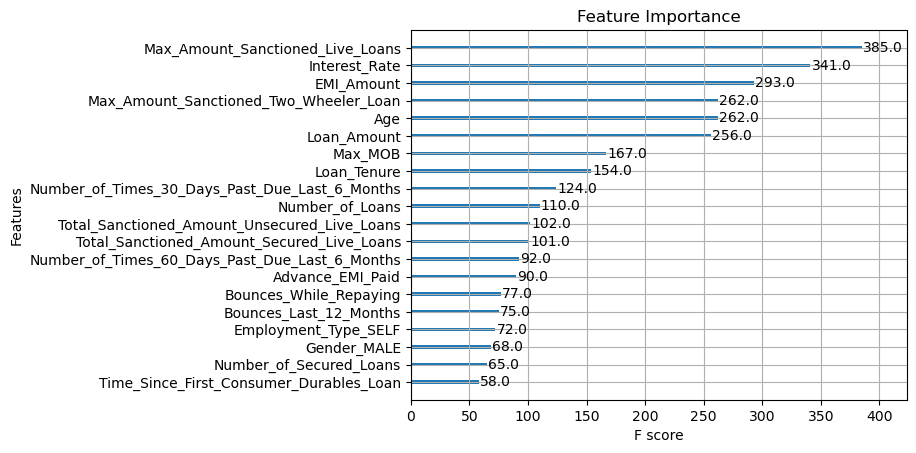

In [97]:
xgboost_model(data_3)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8620
           1       0.14      0.13      0.14       167

    accuracy                           0.97      8787
   macro avg       0.56      0.56      0.56      8787
weighted avg       0.97      0.97      0.97      8787



100%|===================| 8756/8787 [00:20<00:00]        

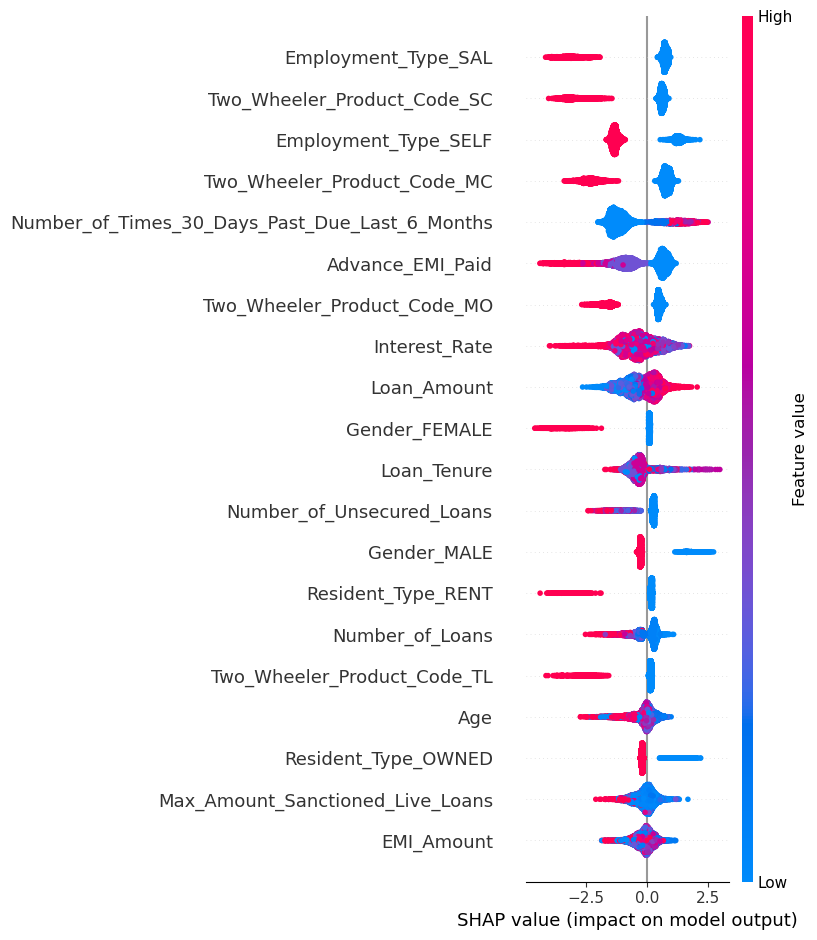

<Figure size 1000x800 with 0 Axes>

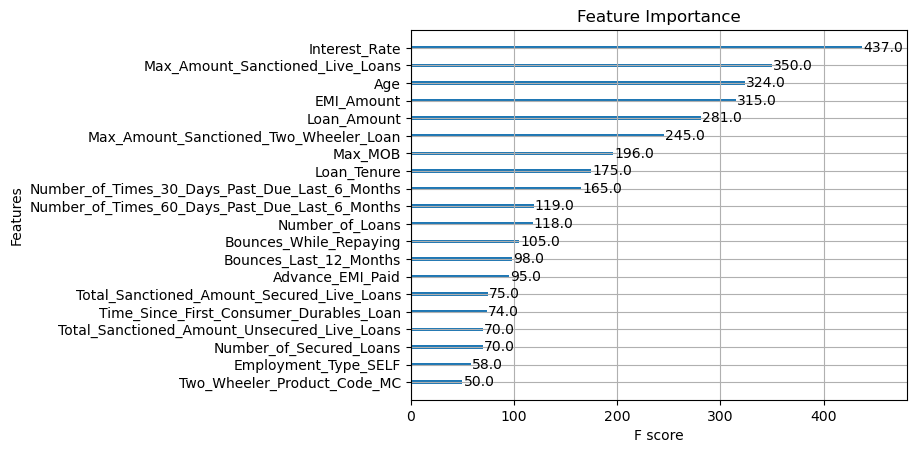

In [98]:
xgboost_model(data_4)

# 地區三模型—風險因子評估

In [102]:
X = data_3.drop(['Target', 'Tier', 'Dealer_Code', 'Number_of_New_Loans_Last_3_Months'], axis=1)
y = data_3['Target']
X = pd.get_dummies(X, columns=['Two_Wheeler_Product_Code', 'Gender', 'Employment_Type', 'Resident_Type'], dtype=int)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# 使用 SMOTE 平衡樣本
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# 設置隨機森林模型和參數網格
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': np.arange(100, 450, 50),
    'max_depth': np.arange(5, 21, 5)
}

# 使用 GridSearchCV 進行參數搜索
recall_scorer = make_scorer(recall_score, greater_is_better=True)
rf_searcher = GridSearchCV(
    estimator=rf, 
    param_grid=rf_param_grid, 
    scoring=recall_scorer,
    cv=5,
    refit=True,
    n_jobs=-1
)

rf_searcher.fit(X_train_resampled, y_train_resampled)
best_rf = rf_searcher.best_estimator_

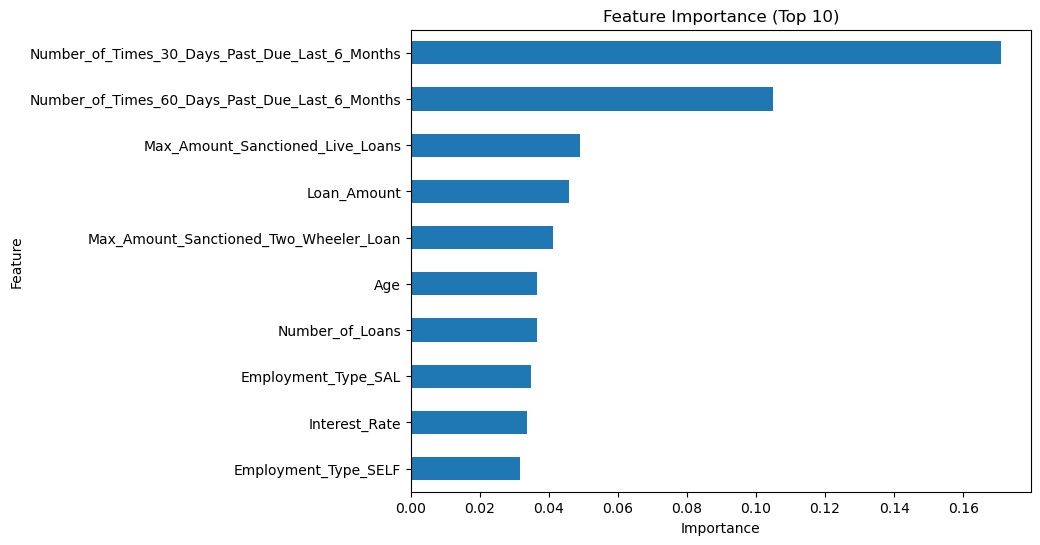

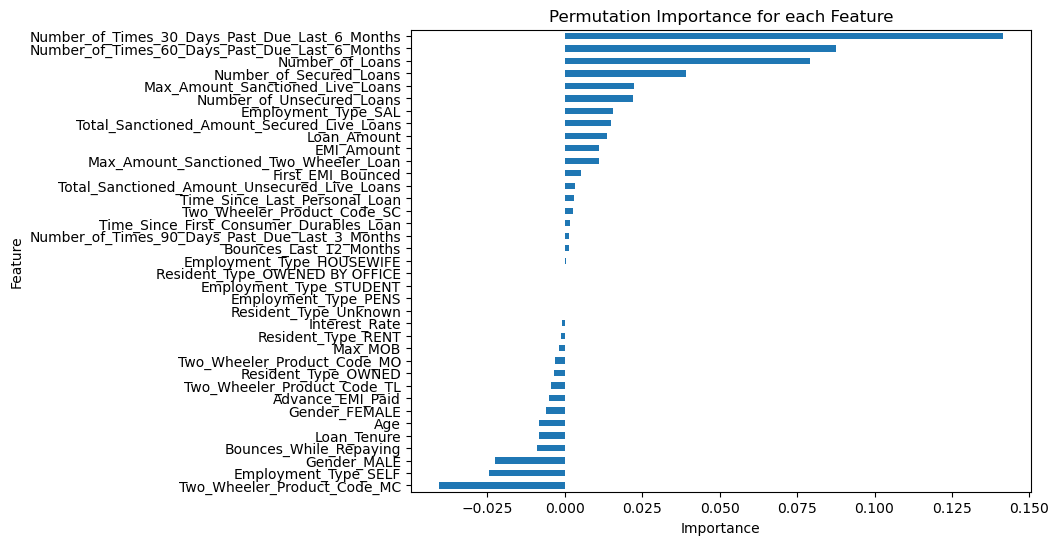

In [103]:
# 特徵重要性分析 - 使用 feature_importances_
feature_importance = pd.DataFrame(best_rf.feature_importances_, index=X_test.columns, columns=['Importance'])
top_features = feature_importance['Importance'].sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top_features.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Top 10)')
plt.gca().invert_yaxis()  # 顛倒 y 軸順序，讓重要性高的特徵在上面顯示
plt.show()

# 使用 permutation_importance 的圖表呈現特徵重要性
rf_pfi = permutation_importance(best_rf, X_test, y_test, n_repeats=20,
                                    scoring = recall_scorer, random_state=42, n_jobs=-1)

plt.figure(figsize=(8, 6))
pd.Series(rf_pfi.importances_mean, index=X_test.columns).sort_values().plot.barh()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance for each Feature')
plt.show()

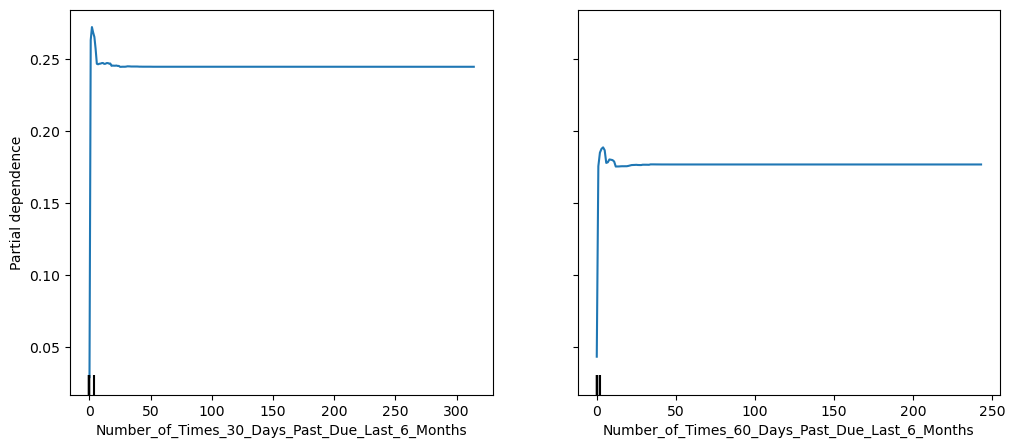

In [160]:
important_features = ['Number_of_Times_30_Days_Past_Due_Last_6_Months', 
                      'Number_of_Times_60_Days_Past_Due_Last_6_Months']
# PDP
fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(best_rf, X_train, features=important_features, ax=ax)
plt.show()

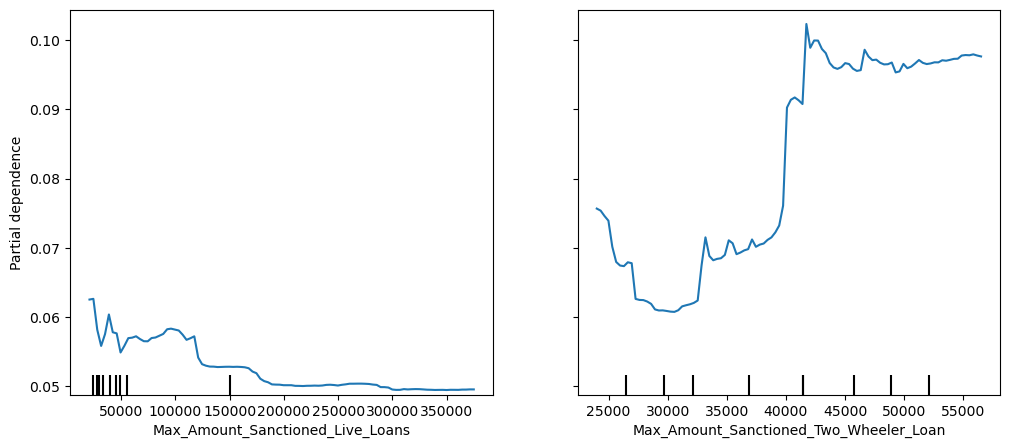

In [161]:
important_features = [
                      'Max_Amount_Sanctioned_Live_Loans','Max_Amount_Sanctioned_Two_Wheeler_Loan']

# PDP
fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(best_rf, X_train, features=important_features, ax=ax)
plt.show()

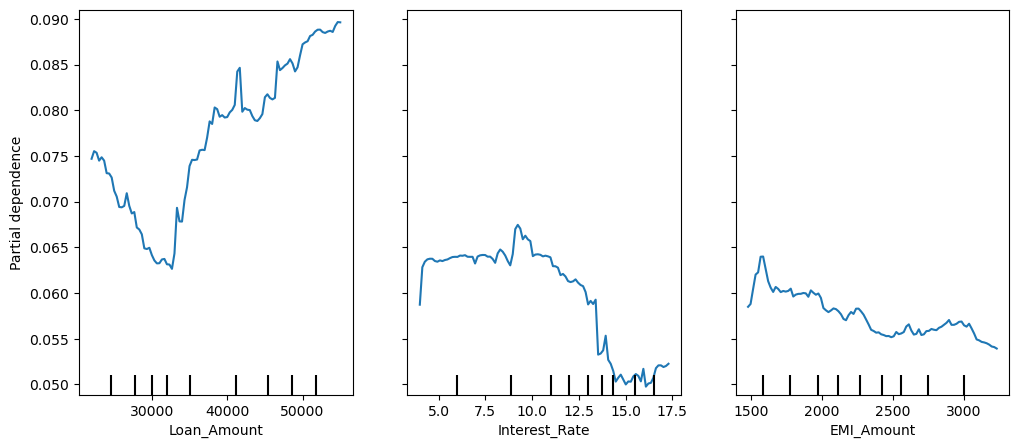

In [162]:
important_features = ['Loan_Amount', 
                      'Interest_Rate', 
                      'EMI_Amount']

# 绘制部分依赖图
fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(best_rf, X_train, features=important_features, ax=ax)
plt.show()

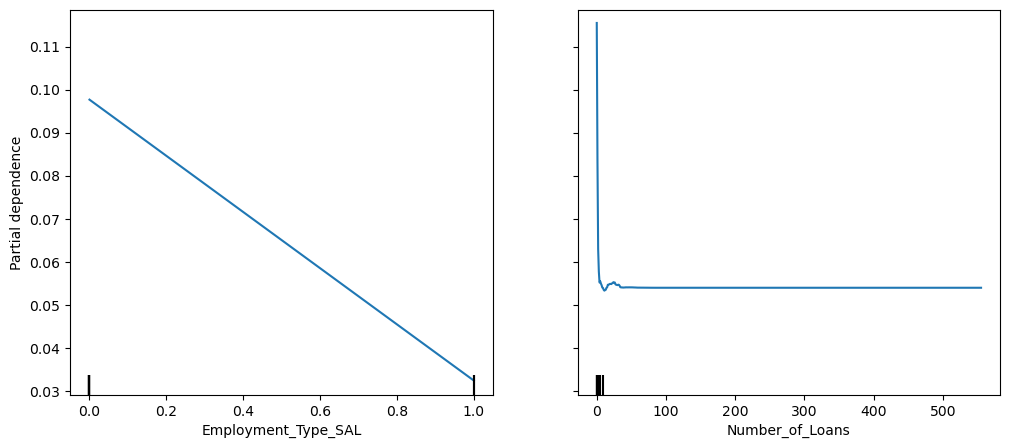

In [163]:
important_features = ['Employment_Type_SAL', 
                      'Number_of_Loans']

# 绘制部分依赖图
fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(best_rf, X_train, features=important_features, ax=ax)
plt.show()

# 地區四模型—風險因子評估

In [99]:
# 刪除Total_Sanctioned_Amount_Secured_Live_Loans, Total_Sanctioned_Amount_Unsecured_Live_Loans後的recall值較高

X = data_4.drop(['Target', 'Tier', 'Dealer_Code', 'Number_of_New_Loans_Last_3_Months',
                 'Total_Sanctioned_Amount_Secured_Live_Loans', 'Total_Sanctioned_Amount_Unsecured_Live_Loans'], axis=1)
y = data_4['Target']
X = pd.get_dummies(X, columns=['Two_Wheeler_Product_Code', 'Gender', 'Employment_Type', 'Resident_Type'], dtype=int)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
    
# 使用 SMOTE 平衡樣本
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
    
# 設置隨機森林模型和參數網格
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': np.arange(100, 450, 50),
    'max_depth': np.arange(5, 21, 5)
}

# 使用 GridSearchCV 進行參數搜索
recall_scorer = make_scorer(recall_score, greater_is_better=True)
rf_searcher = GridSearchCV(
    estimator=rf, 
    param_grid=rf_param_grid, 
    scoring=recall_scorer,
    cv=5,
    refit=True,
    n_jobs=-1
)

rf_searcher.fit(X_train_resampled, y_train_resampled)
best_rf = rf_searcher.best_estimator_

In [101]:
# 評估模型
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8620
           1       0.17      0.23      0.20       167

    accuracy                           0.96      8787
   macro avg       0.58      0.60      0.59      8787
weighted avg       0.97      0.96      0.97      8787



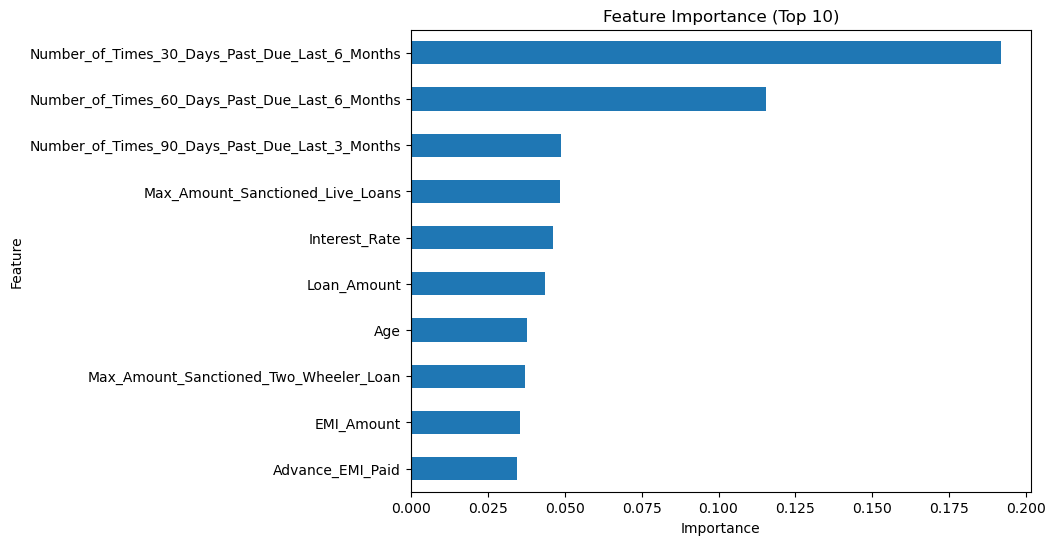

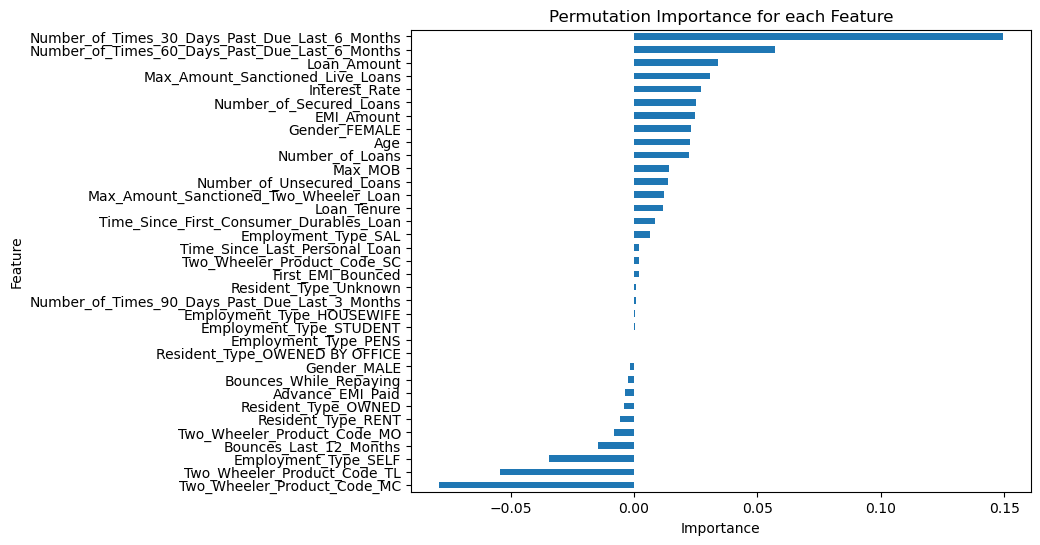

In [100]:
# 特徵重要性分析 - 使用 feature_importances_
feature_importance = pd.DataFrame(best_rf.feature_importances_, index=X_test.columns, columns=['Importance'])
top_features = feature_importance['Importance'].sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top_features.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Top 10)')
plt.gca().invert_yaxis()  # 顛倒 y 軸順序，讓重要性高的特徵在上面顯示
plt.show()

# 使用 permutation_importance 的圖表呈現特徵重要性
rf_pfi = permutation_importance(best_rf, X_test, y_test, n_repeats=20,
                                    scoring = recall_scorer, random_state=42, n_jobs=-1)

plt.figure(figsize=(8, 6))
pd.Series(rf_pfi.importances_mean, index=X_test.columns).sort_values().plot.barh()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance for each Feature')
plt.show()

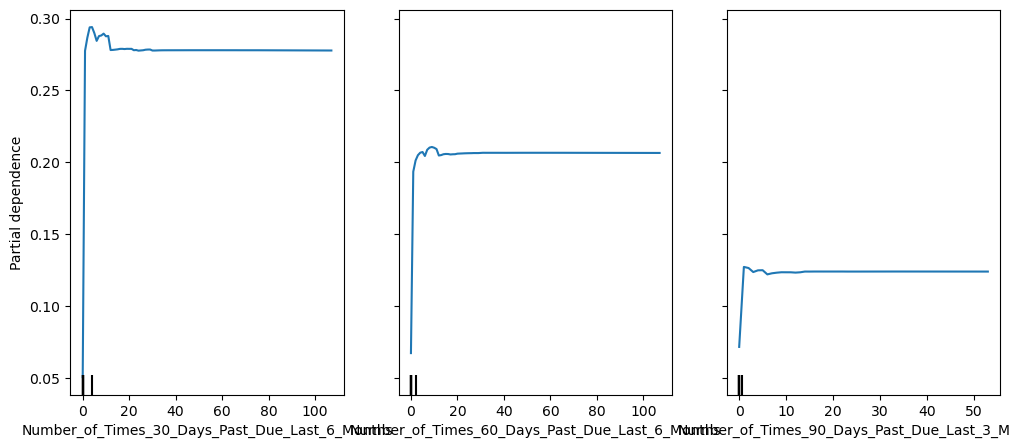

In [165]:
important_features = ['Number_of_Times_30_Days_Past_Due_Last_6_Months', 
                      'Number_of_Times_60_Days_Past_Due_Last_6_Months',
                      'Number_of_Times_90_Days_Past_Due_Last_3_Months']
# 绘制部分依赖图
fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(best_rf, X_train, features=important_features, ax=ax)
plt.show()

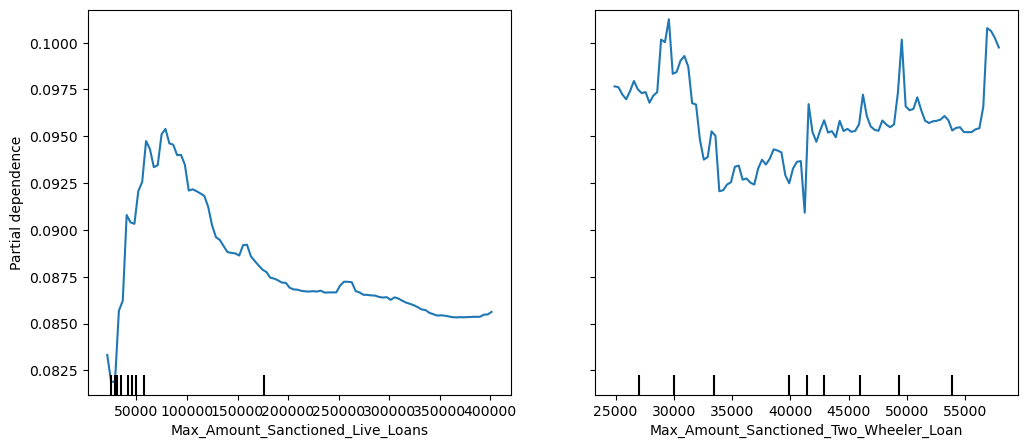

In [166]:
important_features = ['Max_Amount_Sanctioned_Live_Loans', 
                      'Max_Amount_Sanctioned_Two_Wheeler_Loan']
# 绘制部分依赖图
fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(best_rf, X_train, features=important_features, ax=ax)
plt.show()

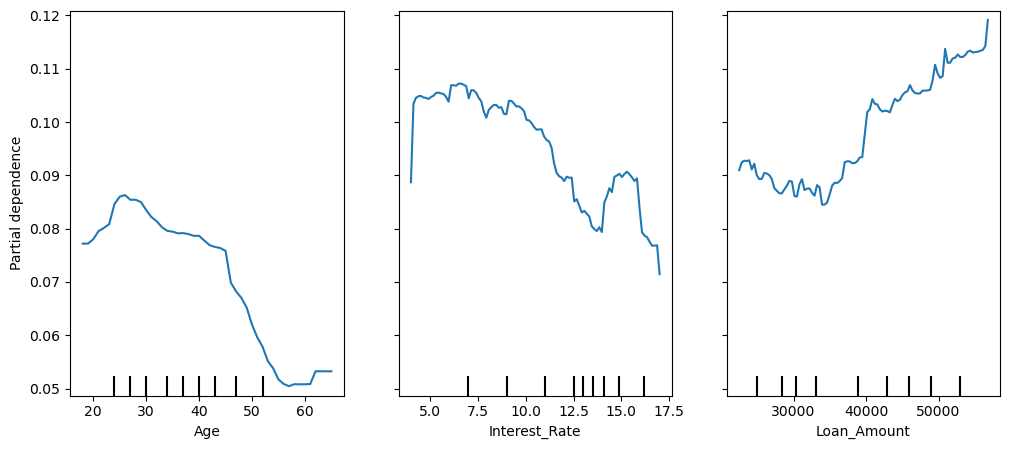

In [167]:
important_features = ['Age',
                      'Interest_Rate', 
                      'Loan_Amount']
# 绘制部分依赖图
fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(best_rf, X_train, features=important_features, ax=ax)
plt.show()